<a href="https://colab.research.google.com/github/abdullahbasaad/GraphX-Net/blob/main/GraphX-Net%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading & Cleaning data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, f1_score
from sklearn.model_selection import cross_val_score


#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#reading in CSV's from a file path
#train_df = pd.read_csv('METABRIC_DATA_CLINICAL.csv')

import warnings
warnings.filterwarnings('ignore')

#Pandas: whats the data row count?
#print(train_df.shape)

#Pandas: whats the distribution of the data?
#print(train_df.describe())

#Pandas: What types of data do i have?
#print(train_df.info())

sample_data



In [ ]:
# Exclude all rows have many missing values
train_df = train_df[:1985]
train_df.shape[0]
train_df = train_df.drop([9]) # row includes missing values
train_df = train_df.drop(['SEX'], axis=1)
train_df.head(10)

PATIENT_ID  COHORT  AGE_AT_DIAGNOSIS INFERRED_MENOPAUSAL_STATE  \
0     MB-0000     1.0             75.65                      Post   
1     MB-0002     1.0             43.19                       Pre   
2     MB-0005     1.0             48.87                       Pre   
3     MB-0006     1.0             47.68                       Pre   
4     MB-0008     1.0             76.97                      Post   
5     MB-0010     1.0             78.77                      Post   
6     MB-0014     1.0             56.45                      Post   
7     MB-0020     1.0             70.00                      Post   
8     MB-0022     1.0             89.08                      Post   
10    MB-0028     1.0             86.41                      Post   

   TUMOUR CELLULARITY HISTOLOGICAL_SUBTYPE  LYMPH_NODES_EXAMINED_POSITIVE  \
0                 NaN           Ductal/NST                           10.0   
1                High           Ductal/NST                            0.0   
2                High           Ductal/NST                            1.0   
3            Moderate                Mixed                            3.0   
4                High                Mixed                            8.0   
5            Moderate           Ductal/NST                            0.0   
6            Moderate           Ductal/NST                            1.0   
7                High              Lobular                            NaN   
8            Moderate                Mixed                            1.0   
10           Moderate           Ductal/NST                            1.0   

    Nottingham Prognostic Index ER STATUS - IHC HER2 STATUS - SNP6  ...  \
0                         6.044         Positve            NEUTRAL  ...   
1                         4.020         Positve            NEUTRAL  ...   
2                         4.030         Positve            NEUTRAL  ...   
3                         4.050         Positve            NEUTRAL  ...   
4                         6.080         Positve            NEUTRAL  ...   
5                         4.062         Positve            NEUTRAL  ...   
6                         4.020         Positve               LOSS  ...   
7                         6.130        Negative            NEUTRAL  ...   
8                         4.058         Positve            NEUTRAL  ...   
10                        5.032         Positve               GAIN  ...   

   Overall Survival Status Pam50 + Claudin-low subtype  \
0                 0:LIVING                 claudin-low   
1                 0:LIVING                        LumA   
2               1:DECEASED                        LumB   
3                 0:LIVING                        LumB   
4               1:DECEASED                        LumB   
5               1:DECEASED                        LumB   
6                 0:LIVING                        LumB   
7               1:DECEASED                      Normal   
8               1:DECEASED                 claudin-low   
10              1:DECEASED                        LumB   

    3-Gene classifier subtype Patient's Vital Status Primary Tumor Laterality  \
0                   ER-/HER2-                 Living                    Right   
1       ER+/HER2- High Prolif                 Living                    Right   
2                         NaN        Died of Disease                    Right   
3                         NaN                 Living                    Right   
4       ER+/HER2- High Prolif        Died of Disease                    Right   
5       ER+/HER2- High Prolif        Died of Disease                     Left   
6                         NaN                 Living                    Right   
7                   ER-/HER2-        Died of Disease                     Left   
8                         NaN   Died of Other Causes                     Left   
10      ER+/HER2- High Prolif   Died of Other Causes                    Right   

   RADIO_THERAPY Type of Breast Surger

In [ ]:
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.isnull()

PATIENT_ID  COHORT  AGE_AT_DIAGNOSIS  INFERRED_MENOPAUSAL_STATE  \
0          False   False             False                      False   
1          False   False             False                      False   
2          False   False             False                      False   
3          False   False             False                      False   
4          False   False             False                      False   
...          ...     ...               ...                        ...   
1980       False   False             False                      False   
1981       False   False             False                      False   
1982       False   False             False                      False   
1983       False   False             False                      False   
1984       False   False             False                      False   

      TUMOUR CELLULARITY  HISTOLOGICAL_SUBTYPE  LYMPH_NODES_EXAMINED_POSITIVE  \
0                   True                 False                          False   
1                  False                 False                          False   
2                  False                 False                          False   
3                  False                 False                          False   
4                  False                 False                          False   
...                  ...                   ...                            ...   
1980               False                 False                          False   
1981               False                 False                          False   
1982               False                 False                          False   
1983               False                 False                          False   
1984               False                 False                          False   

      Nottingham Prognostic Index  ER STATUS - IHC  HER2 STATUS - SNP6  ...  \
0                           False            False               False  ...   
1                           False            False               False  ...   
2                           False            False               False  ...   
3                           False            False               False  ...   
4                           False            False               False  ...   
...                           ...              ...                 ...  ...   
1980                        False            False               False  ...   
1981                        False            False               False  ...   
1982                        False            False               False  ...   
1983                        False            False               False  ...   
1984                        False            False               False  ...   

      Overall Survival Status  Pam50 + Claudin-low subtype  \
0                       False                        False   
1                       False                        False   
2                       False                        False   
3                       False                        False   
4                       False                        False   
...                       ...                          ...   
1980                    False                        False   
1981                    False                        False   
1982                    False                        False   
1983                    False                        False   
1984                    False                        False   

      3-Gene classifier subtype  Patient's Vital Status  \
0                         False                   False   
1                         False                   False   
2                          True                   False   
3                          True                   False   
4                         False                   False   
...                         ...                     ...   
1980                      False                  

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


                               Total   Percent
3-Gene classifier subtype        220  0.110887
Primary Tumor Laterality         114  0.057460
LYMPH_NODES_EXAMINED_POSITIVE     76  0.038306
TUMOUR CELLULARITY                67  0.033770
HISTOLOGICAL_SUBTYPE              46  0.023185
ER STATUS - IHC                   43  0.021673
Type of Breast Surgery            29  0.014617
Integrative Cluster                4  0.002016
CHEMOTHERAPY                       4  0.002016
Patient's Vital Status             4  0.002016
Pam50 + Claudin-low subtype        4  0.002016
HER2 STATUS - SNP6                 4  0.002016
HORMONE_THERAPY                    4  0.002016
INFERRED_MENOPAUSAL_STATE          4  0.002016
RADIO_THERAPY                      4  0.002016
Overall Survival (Months)          3  0.001512
Overall Survival Status            3  0.001512
Nottingham Prognostic Index        1  0.000504
Relapse Free Status                1  0.000504
PATIENT_ID                         0  0.000000
COHORT       

In [ ]:
train_df = train_df.dropna(subset=['3-Gene classifier subtype'], how='all')
train_df = train_df.dropna(subset=['LYMPH_NODES_EXAMINED_POSITIVE'], how='all')
train_df = train_df.dropna(subset=['Primary Tumor Laterality'], how='all')
train_df = train_df.dropna(subset=['LYMPH_NODES_EXAMINED_POSITIVE'], how='all')
train_df = train_df.dropna(subset=['TUMOUR CELLULARITY'], how='all')
train_df = train_df.dropna(subset=['ER STATUS - IHC'], how='all')
train_df = train_df.dropna(subset=['HISTOLOGICAL_SUBTYPE'], how='all')
train_df = train_df.dropna(subset=['Type of Breast Surgery'], how='all')
train_df = train_df.dropna(subset=['Relapse Free Status'], how='all')

In [ ]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                               Total  Percent
PATIENT_ID                         0      0.0
Overall Survival (Months)          0      0.0
Relapse Free Status                0      0.0
CHEMOTHERAPY                       0      0.0
Type of Breast Surgery             0      0.0
RADIO_THERAPY                      0      0.0
Primary Tumor Laterality           0      0.0
Patient's Vital Status             0      0.0
3-Gene classifier subtype          0      0.0
Pam50 + Claudin-low subtype        0      0.0
Overall Survival Status            0      0.0
Integrative Cluster                0      0.0
COHORT                             0      0.0
HORMONE_THERAPY                    0      0.0
HER2 STATUS - SNP6                 0      0.0
ER STATUS - IHC                    0      0.0
Nottingham Prognostic Index        0      0.0
LYMPH_NODES_EXAMINED_POSITIVE      0      0.0
HISTOLOGICAL_SUBTYPE               0      0.0
TUMOUR CELLULARITY                 0      0.0
INFERRED_MENOPAUSAL_STATE         

In [ ]:
train_df.shape

(1519, 23)

In [ ]:
#Check categorical variables
for i in train_df.columns:
    print(i, train_df[i].unique())

PATIENT_ID ['MB-0002' 'MB-0008' 'MB-0010' ... 'MB-7284' 'MB-7286' 'MB-7295']
COHORT [1. 2. 3. 5. 4.]
AGE_AT_DIAGNOSIS [43.19 76.97 78.77 ... 61.23 66.48 43.1 ]
INFERRED_MENOPAUSAL_STATE ['Pre' 'Post']
TUMOUR CELLULARITY ['High' 'Moderate' 'Low']
HISTOLOGICAL_SUBTYPE ['Ductal/NST' 'Mixed' 'Lobular' 'Tubular/ cribriform' 'Mucinous'
 'Medullary' 'Other']
LYMPH_NODES_EXAMINED_POSITIVE [ 0.  8.  1.  3. 16.  5. 14.  6.  2.  4.  9. 22.  7. 21. 13. 12. 25. 10.
 41. 15. 11. 19. 17. 18. 23. 26. 20. 31.]
Nottingham Prognostic Index [4.02    6.08    4.062   5.032   3.056   3.044   4.066   4.046   4.032
 4.078   3.068   5.08    4.14    2.054   6.3     5.034   3.06    4.05
 4.12    5.052   5.06    3.04    4.1     2.018   3.07    3.028   6.048
 2.034   3.16    5.044   5.07    3.026   3.036   4.06    4.054   3.032
 6.052   5.076   4.038   6.1     4.024   3.024   4.028   6.104   5.048
 4.034   3.052   4.04    6.088   4.048   6.072   4.088   6.068   4.042
 3.05    6.096   2.026   6.038   5.042   6.056  

In [ ]:
train_df = train_df.rename(columns={
       "TUMOUR CELLULARITY": "TUMOUR_CELLULARITY",
       "Nottingham Prognostic Index":"Nottingham_Prognostic_Index",
       "ER STATUS - IHC":"ER_STATUS_IHC",
       "HER2 STATUS - SNP6":"HER2_STATUS_SNP6",
       "Integrative Cluster":"Integrative_Cluster",
       "Overall Survival (Months)":"Overall_Survival_Months",
       "Overall Survival Status":"Overall_Survival_Status",
       "Pam50 + Claudin-low subtype":"Pam50_Claudin_low_subtype",
       "3-Gene classifier subtype":"three_Gene_classifier_subtype",
       "Patient's Vital Status":"Patient_Vital_Status",
       "Primary Tumor Laterality":"Primary_Tumor_Laterality",
       "Type of Breast Surgery":"Type_of_Breast_Surgery",
       "Relapse Free Status":"Relapse_Free_Status",
       "Relapse Free Status (Months)":"Relapse_Free_Status_Months"})

In [ ]:
labelDict = {}
for feature in train_df:
    if feature not in ['PATIENT_ID','COHORT', 'AGE_AT_DIAGNOSIS','LYMPH_NODES_EXAMINED_POSITIVE','Nottingham_Prognostic_Index','Overall_Survival_Months', 'Relapse_Free_Status_Months']:
        le = preprocessing.LabelEncoder()
        le.fit(train_df[feature])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(feature, le_name_mapping)
        train_df[feature] = le.transform(train_df[feature])
        # Get labels
        labelKey = 'label_' + feature
        labelValue = [*le_name_mapping]
        labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

train_df.head()

INFERRED_MENOPAUSAL_STATE {'Post': 0, 'Pre': 1}
TUMOUR_CELLULARITY {'High': 0, 'Low': 1, 'Moderate': 2}
HISTOLOGICAL_SUBTYPE {'Ductal/NST': 0, 'Lobular': 1, 'Medullary': 2, 'Mixed': 3, 'Mucinous': 4, 'Other': 5, 'Tubular/ cribriform': 6}
ER_STATUS_IHC {'Negative': 0, 'Positve': 1}
HER2_STATUS_SNP6 {'GAIN': 0, 'LOSS': 1, 'NEUTRAL': 2, 'UNDEF': 3}
HORMONE_THERAPY {'NO': 0, 'YES': 1}
Integrative_Cluster {'1': 0, '10': 1, '2': 2, '3': 3, '4ER+': 4, '4ER-': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10}
Overall_Survival_Status {'0:LIVING': 0, '1:DECEASED': 1}
Pam50_Claudin_low_subtype {'Basal': 0, 'Her2': 1, 'LumA': 2, 'LumB': 3, 'NC': 4, 'Normal': 5, 'claudin-low': 6}
three_Gene_classifier_subtype {'ER+/HER2- High Prolif': 0, 'ER+/HER2- Low Prolif': 1, 'ER-/HER2-': 2, 'HER2+': 3}
Patient_Vital_Status {'Died of Disease': 0, 'Died of Other Causes': 1, 'Living': 2}
Primary_Tumor_Laterality {'Left': 0, 'Right': 1}
RADIO_THERAPY {'NO': 0, 'YES': 1}
Type_of_Breast_Surgery {'BREAST CONSERVING': 0, '

PATIENT_ID  COHORT  AGE_AT_DIAGNOSIS  INFERRED_MENOPAUSAL_STATE  \
1     MB-0002     1.0             43.19                          1   
4     MB-0008     1.0             76.97                          0   
5     MB-0010     1.0             78.77                          0   
10    MB-0028     1.0             86.41                          0   
11    MB-0035     1.0             84.22                          0   

    TUMOUR_CELLULARITY  HISTOLOGICAL_SUBTYPE  LYMPH_NODES_EXAMINED_POSITIVE  \
1                    0                     0                            0.0   
4                    0                     3                            8.0   
5                    2                     0                            0.0   
10                   2                     0                            1.0   
11                   0                     1                            0.0   

    Nottingham_Prognostic_Index  ER_STATUS_IHC  HER2_STATUS_SNP6  ...  \
1                         4.020              1                 2  ...   
4                         6.080              1                 2  ...   
5                         4.062              1                 2  ...   
10                        5.032              1                 0  ...   
11                        3.056              0                 1  ...   

    Overall_Survival_Status  Pam50_Claudin_low_subtype  \
1                         0                          2   
4                         1                          3   
5                         1                          3   
10                        1                          3   
11                        1                          1   

    three_Gene_classifier_subtype  Patient_Vital_Status  \
1                               0                     2   
4                               0                     0   
5                               0                     0   
10                              0                     1   
11                              0                     0   

    Primary_Tumor_Laterality  RADIO_THERAPY  Type_of_Breast_Surgery  \
1                          1              1                       0   
4                          1              1                       1   
5                          0              1                       1   
10                         1              1                       0   
11                         0              0                       1   

    CHEMOTHERAPY  Relapse_Free_Status  Relapse_Free_Status_Months  
1              0                    0                       83.52  
4              1                    1                       18.55  
5              0                    1                        2.89  
10             0                    0                       36.09  
11             0                    1                       35.79  

[5 rows x 23 columns]

In [ ]:
# update patient id, keep it integers
train_df['PATIENT_ID'] = train_df['PATIENT_ID'].str.replace(r'\D', '', regex=True).astype(int)
train_df.head(5)

PATIENT_ID  COHORT  AGE_AT_DIAGNOSIS  INFERRED_MENOPAUSAL_STATE  \
1            2     1.0             43.19                          1   
4            8     1.0             76.97                          0   
5           10     1.0             78.77                          0   
10          28     1.0             86.41                          0   
11          35     1.0             84.22                          0   

    TUMOUR_CELLULARITY  HISTOLOGICAL_SUBTYPE  LYMPH_NODES_EXAMINED_POSITIVE  \
1                    0                     0                            0.0   
4                    0                     3                            8.0   
5                    2                     0                            0.0   
10                   2                     0                            1.0   
11                   0                     1                            0.0   

    Nottingham_Prognostic_Index  ER_STATUS_IHC  HER2_STATUS_SNP6  ...  \
1                         4.020              1                 2  ...   
4                         6.080              1                 2  ...   
5                         4.062              1                 2  ...   
10                        5.032              1                 0  ...   
11                        3.056              0                 1  ...   

    Overall_Survival_Status  Pam50_Claudin_low_subtype  \
1                         0                          2   
4                         1                          3   
5                         1                          3   
10                        1                          3   
11                        1                          1   

    three_Gene_classifier_subtype  Patient_Vital_Status  \
1                               0                     2   
4                               0                     0   
5                               0                     0   
10                              0                     1   
11                              0                     0   

    Primary_Tumor_Laterality  RADIO_THERAPY  Type_of_Breast_Surgery  \
1                          1              1                       0   
4                          1              1                       1   
5                          0              1                       1   
10                         1              1                       0   
11                         0              0                       1   

    CHEMOTHERAPY  Relapse_Free_Status  Relapse_Free_Status_Months  
1              0                    0                       83.52  
4              1                    1                       18.55  
5              0                    1                        2.89  
10             0                    0                       36.09  
11             0                    1                       35.79  

[5 rows x 23 columns]

In [ ]:
train_df.to_csv('metabric_part1.csv', index=False)
from google.colab import files
files.download("metabric_part1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

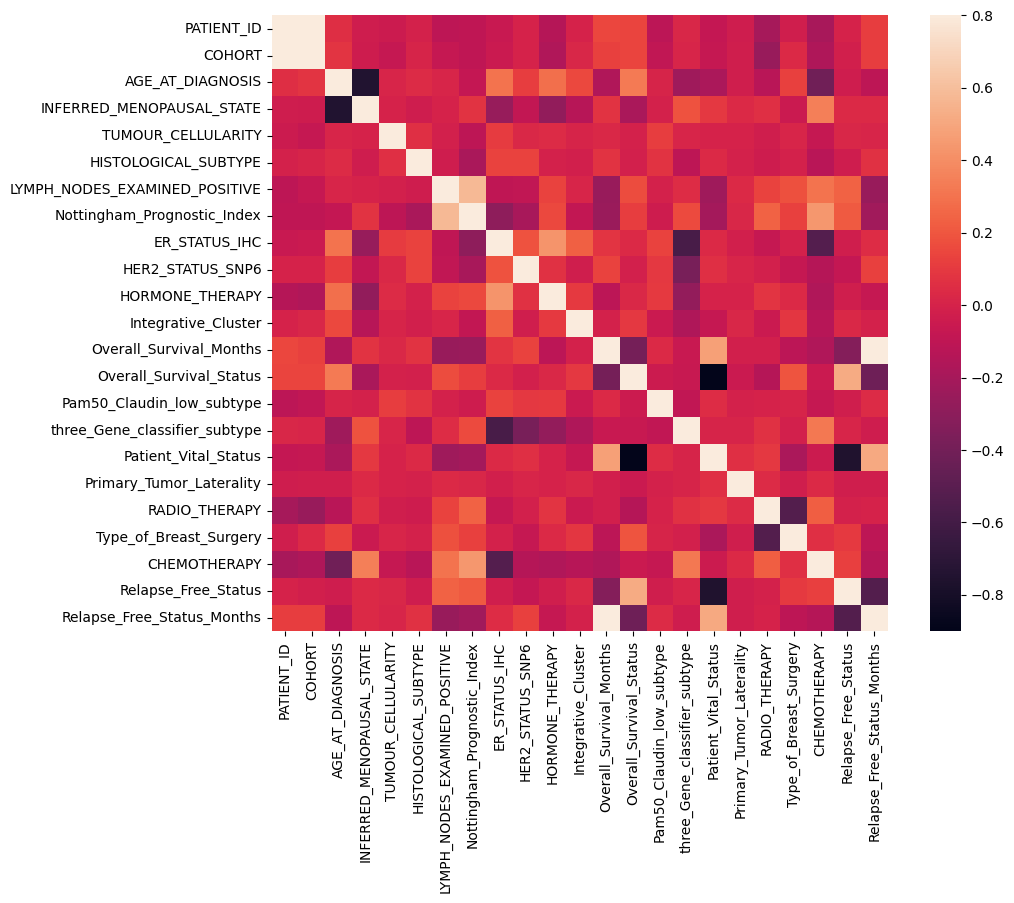

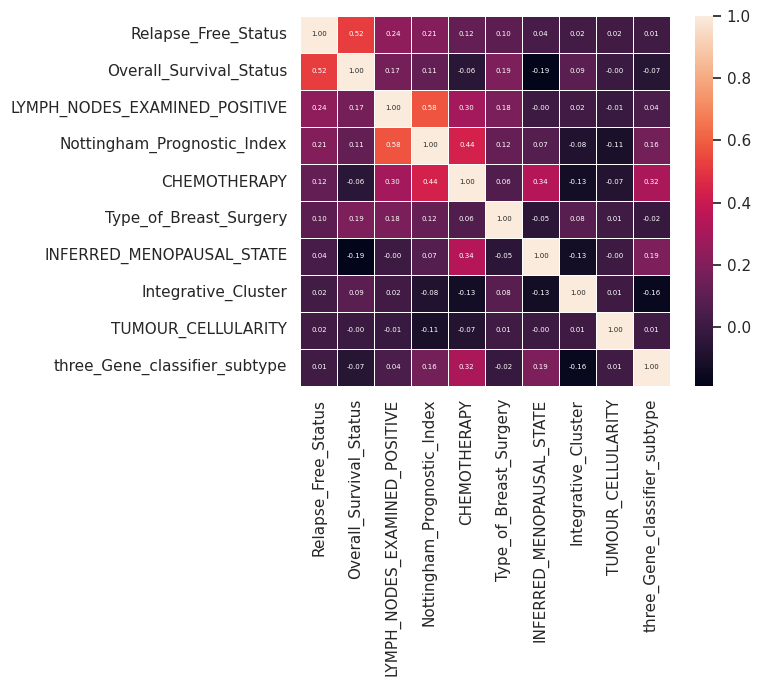

<Figure size 1600x500 with 0 Axes>

In [ ]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables (features) for heatmap
cols = corrmat.nlargest(k, 'Relapse_Free_Status')['Relapse_Free_Status'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values, linewidths=.5)
plt.figure(figsize = (16,5))
plt.show()

# 2. Data visulisation

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035')])

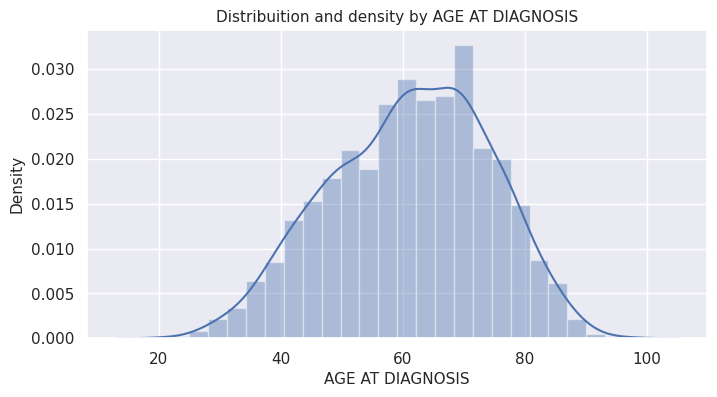

In [ ]:
# Distribiution and density by Age
plt.figure(figsize=(8,4))
sns.distplot(train_df["AGE_AT_DIAGNOSIS"], bins=24)
plt.title("Distribuition and density by AGE AT DIAGNOSIS", fontsize=11)
plt.xlabel("AGE AT DIAGNOSIS", fontsize=11)
plt.xticks(fontsize=11)
plt.ylabel("Density",fontsize=11)
plt.yticks(fontsize=11)

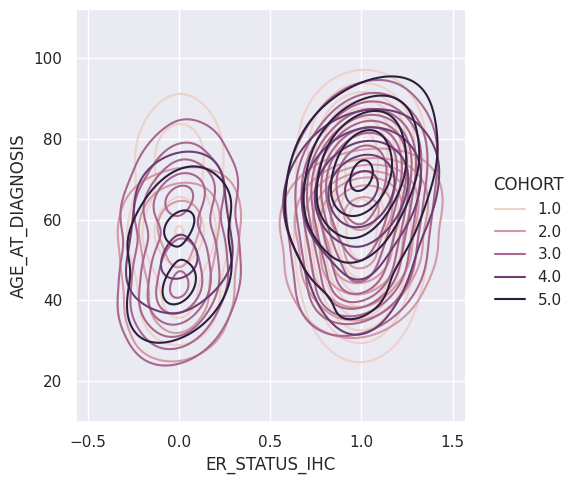

In [ ]:
sns.displot(train_df, x="ER_STATUS_IHC", y="AGE_AT_DIAGNOSIS", hue="COHORT", kind="kde")

# 3. Splitting, SMOTE, Feature importances

In [ ]:
# define X and y
feature_cols = ['Overall_Survival_Status', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Nottingham_Prognostic_Index', 'CHEMOTHERAPY', 'Type_of_Breast_Surgery', 'INFERRED_MENOPAUSAL_STATE', 'Integrative_Cluster', 'TUMOUR_CELLULARITY', 'three_Gene_classifier_subtype']
X = train_df[feature_cols]
y = train_df['Relapse_Free_Status']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
methodDict = {}
rmseDict = ()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import collections as co

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
counter = co.Counter(y)
print('y Before: ',counter)
sm = SMOTE()
X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
counter = co.Counter(y)
print('y After: ',counter)

y Before:  Counter({0: 913, 1: 606})
y After:  Counter({0: 913, 1: 913})


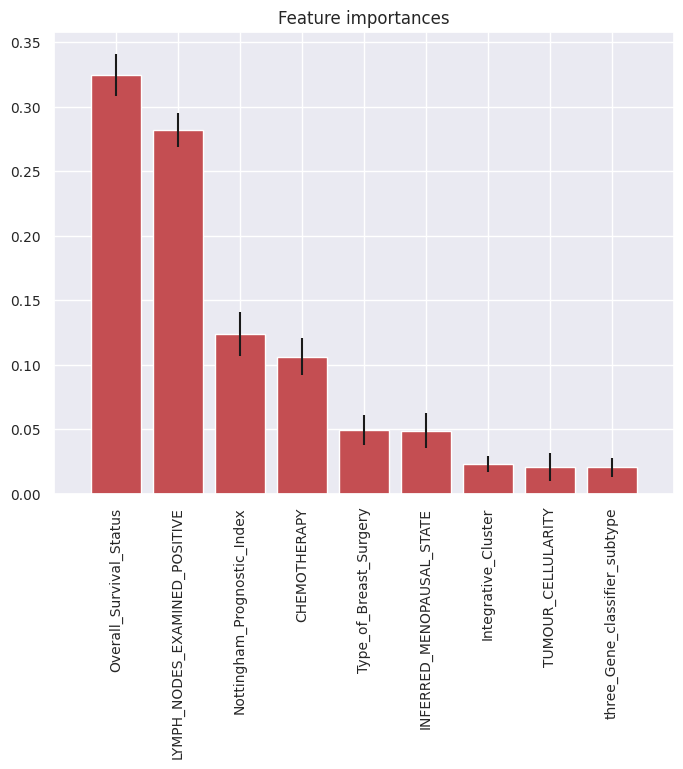

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 4. Classical ML & Evaluation Models

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, f1_score
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    print('f1: ', f1_score(y_test.values, y_pred_class))

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    #plt.figure(figsize=(8,6))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        #plt.figure(figsize=(8,6))
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of Recurred')
        plt.ylabel('Frequency')


    # predict recurred if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################

    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # I pass y_test and y_pred_prob
    # I do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    # To reduce unnecessary computations we used RandomizedSearchCV and to get the best set of hyperparameters.
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    #rand.grid_scores_
    rand.best_score_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

########### Logistic Regression ###############
Accuracy: 0.7486338797814208
Null accuracy:
 0    190
1    176
Name: Relapse_Free_Status, dtype: int64
Percentage of ones: 0.4808743169398907
Percentage of zeros: 0.5191256830601093
True: [1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
Pred: [0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
f1:  0.77


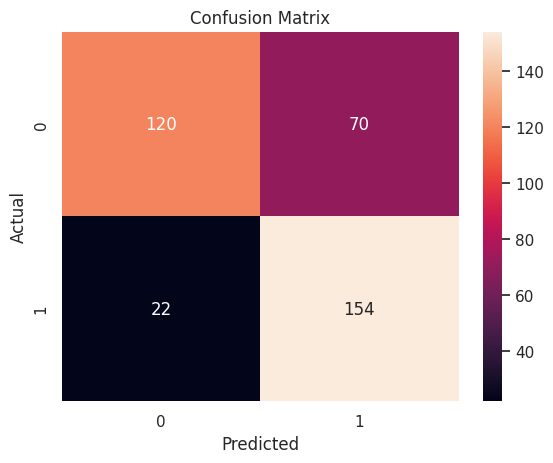

Classification Accuracy: 0.7486338797814208
Classification Error: 0.2513661202185792
False Positive Rate: 0.3684210526315789
Precision: 0.6875
AUC Score: 0.7532894736842105
Cross-validated AUC: 0.8188874610816799
First 10 predicted responses:
 [0 1 0 1 1 1 1 0 0 1]
First 10 predicted probabilities of class members:
 [[0.82611421 0.17388579]
 [0.04667355 0.95332645]
 [0.90412676 0.09587324]
 [0.07902644 0.92097356]
 [0.27821328 0.72178672]
 [0.23090796 0.76909204]
 [0.36531322 0.63468678]
 [0.83772035 0.16227965]
 [0.89932071 0.10067929]
 [0.29269931 0.70730069]]
First 10 predicted probabilities:
 [[0.17388579]
 [0.95332645]
 [0.09587324]
 [0.92097356]
 [0.72178672]
 [0.76909204]
 [0.63468678]
 [0.16227965]
 [0.10067929]
 [0.70730069]]


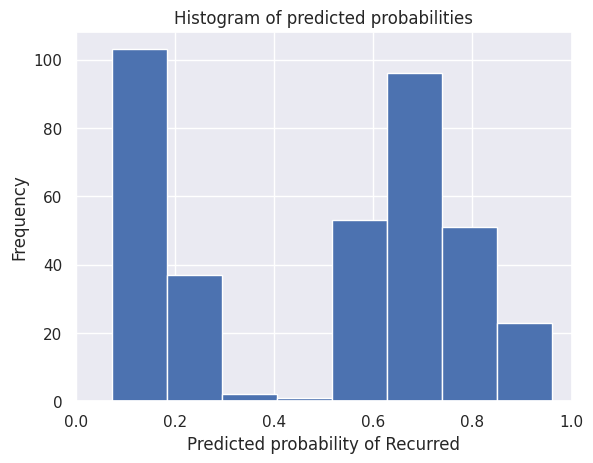

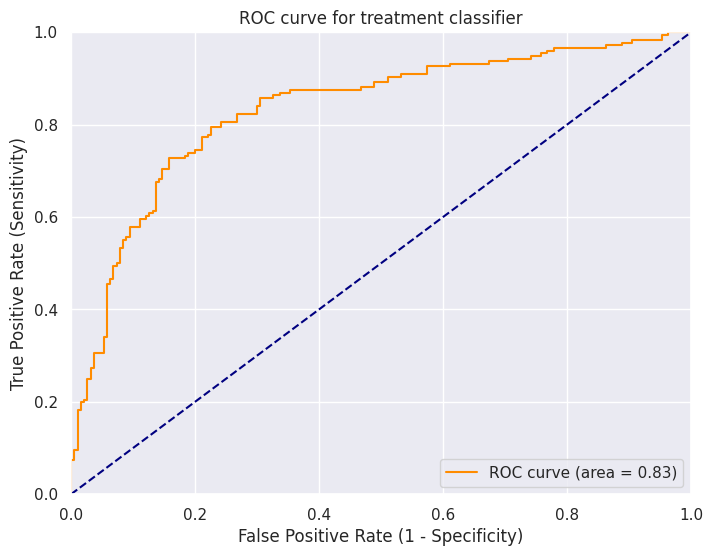

[[120  70]
 [ 22 154]]


In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

logisticRegression()

Rand. Best Score:  0.7339158109649914
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 16}
[0.73, 0.731, 0.734, 0.732, 0.728, 0.731, 0.731, 0.737, 0.732, 0.732, 0.731, 0.734, 0.737, 0.734, 0.732, 0.73, 0.734, 0.732, 0.73, 0.73]
########### KNeighborsClassifier ###############
Accuracy: 0.7076502732240437
Null accuracy:
 0    190
1    176
Name: Relapse_Free_Status, dtype: int64
Percentage of ones: 0.4808743169398907
Percentage of zeros: 0.5191256830601093
True: [1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
Pred: [0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1]
f1:  0.6862170087976539


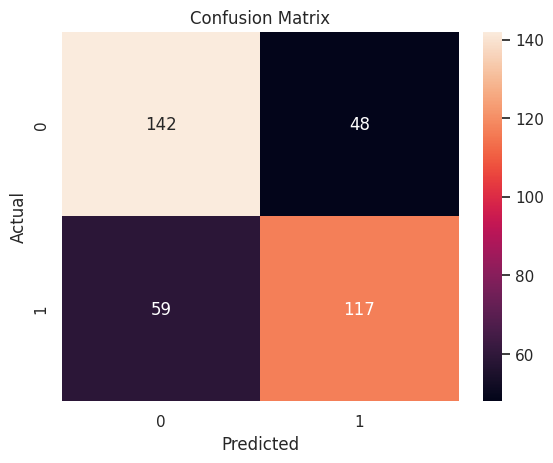

Classification Accuracy: 0.7076502732240437
Classification Error: 0.2923497267759563
False Positive Rate: 0.25263157894736843
Precision: 0.7090909090909091
AUC Score: 0.7060705741626794
Cross-validated AUC: 0.7675774953665542
First 10 predicted responses:
 [0 1 0 1 0 1 1 0 0 1]
First 10 predicted probabilities of class members:
 [[0.62962963 0.37037037]
 [0.07407407 0.92592593]
 [0.74074074 0.25925926]
 [0.14814815 0.85185185]
 [0.55555556 0.44444444]
 [0.33333333 0.66666667]
 [0.44444444 0.55555556]
 [0.77777778 0.22222222]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]]
First 10 predicted probabilities:
 [[0.37037037]
 [0.92592593]
 [0.25925926]
 [0.85185185]
 [0.44444444]
 [0.66666667]
 [0.55555556]
 [0.22222222]
 [0.33333333]
 [0.62962963]]


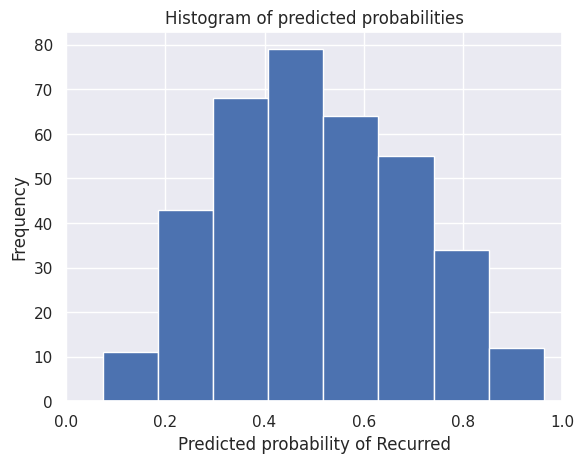

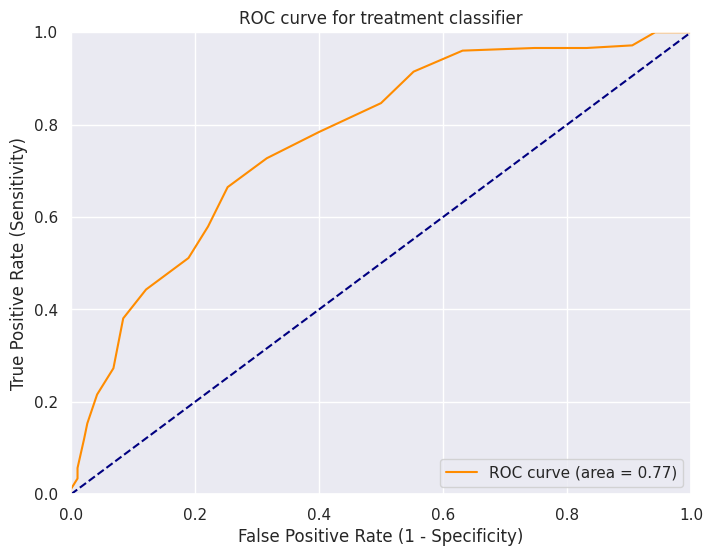

[[142  48]
 [ 59 117]]


In [ ]:
def Knn():
    # k-nearest neighbors (KNN) algorithm
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)

    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)

    # Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)

    print('########### KNeighborsClassifier ###############')

    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

Knn()

########### Random Forests ###############
Accuracy: 0.7650273224043715
Null accuracy:
 0    190
1    176
Name: Relapse_Free_Status, dtype: int64
Percentage of ones: 0.4808743169398907
Percentage of zeros: 0.5191256830601093
True: [1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
Pred: [0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1]
f1:  0.7712765957446809


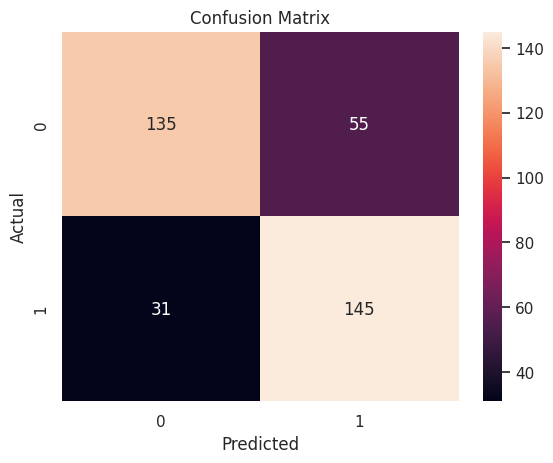

Classification Accuracy: 0.7650273224043715
Classification Error: 0.23497267759562845
False Positive Rate: 0.2894736842105263
Precision: 0.725
AUC Score: 0.7671949760765551
Cross-validated AUC: 0.8482950100544462
First 10 predicted responses:
 [0 1 0 1 1 1 1 0 0 1]
First 10 predicted probabilities of class members:
 [[0.66334214 0.33665786]
 [0.12091983 0.87908017]
 [0.81522662 0.18477338]
 [0.07621763 0.92378237]
 [0.3062514  0.6937486 ]
 [0.24259258 0.75740742]
 [0.30048719 0.69951281]
 [0.90695281 0.09304719]
 [0.73251584 0.26748416]
 [0.24120335 0.75879665]]
First 10 predicted probabilities:
 [[0.33665786]
 [0.87908017]
 [0.18477338]
 [0.92378237]
 [0.6937486 ]
 [0.75740742]
 [0.69951281]
 [0.09304719]
 [0.26748416]
 [0.75879665]]


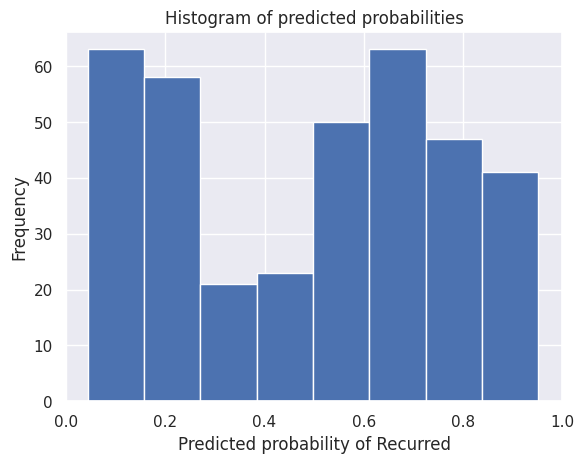

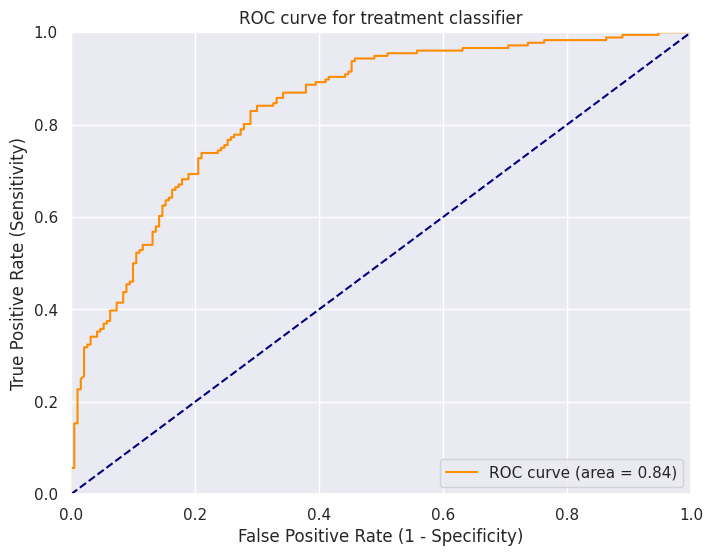

[[135  55]
 [ 31 145]]


In [ ]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, featuresSize),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}

    (forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)

    print('########### Random Forests ###############')
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)
    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

randomForest()

########### Boosting ###############
Accuracy: 0.7595628415300546
Null accuracy:
 0    190
1    176
Name: Relapse_Free_Status, dtype: int64
Percentage of ones: 0.4808743169398907
Percentage of zeros: 0.5191256830601093
True: [1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
Pred: [0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
f1:  0.7621621621621621


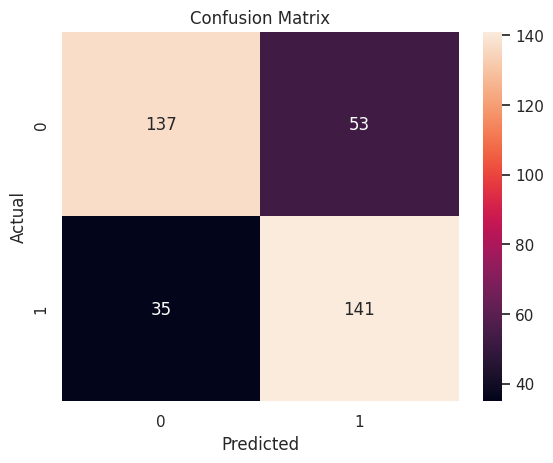

Classification Accuracy: 0.7595628415300546
Classification Error: 0.2404371584699454
False Positive Rate: 0.2789473684210526
Precision: 0.7268041237113402
AUC Score: 0.7610944976076556
Cross-validated AUC: 0.8314565033628579
First 10 predicted responses:
 [0 1 0 1 1 1 1 0 0 1]
First 10 predicted probabilities of class members:
 [[0.50107073 0.49892927]
 [0.49403726 0.50596274]
 [0.50154295 0.49845705]
 [0.49831269 0.50168731]
 [0.49917864 0.50082136]
 [0.49876193 0.50123807]
 [0.49976768 0.50023232]
 [0.50144957 0.49855043]
 [0.50017575 0.49982425]
 [0.4996106  0.5003894 ]]
First 10 predicted probabilities:
 [[0.49892927]
 [0.50596274]
 [0.49845705]
 [0.50168731]
 [0.50082136]
 [0.50123807]
 [0.50023232]
 [0.49855043]
 [0.49982425]
 [0.5003894 ]]


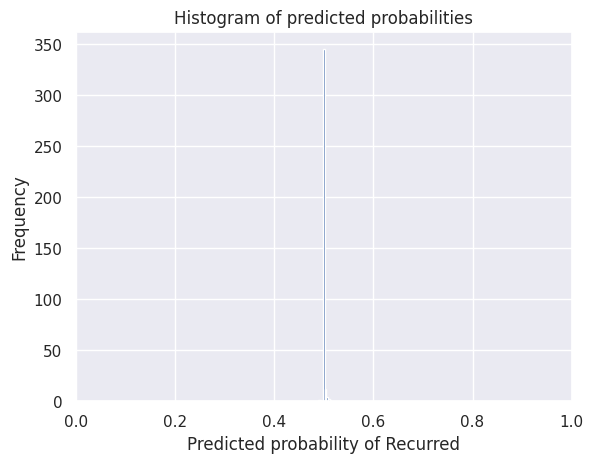

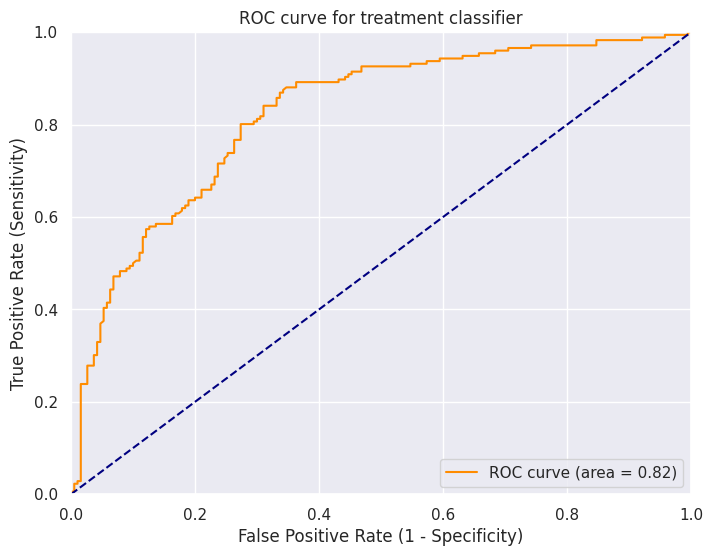

[[137  53]
 [ 35 141]]


In [ ]:
def boosting():
    # Building and fitting
    # To boost the performance of any machine learning algorithm
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)

    print('########### Boosting ###############')

    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

boosting()

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=04de1a1e233d6cce40341a02efdb04540ea73a327cd18576c89919d5478cebca
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
########### Stacking ###############
Accuracy: 0.7486338797814208
Null accuracy:
 0    190
1    176
Name: Relapse_Free_Status, dtype: int64
Percentage of ones: 0.4808743169398907
Percentage of zeros: 0.5191256830601093
True: [1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
Pred: [0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1]
f1:  0.7472527472527473


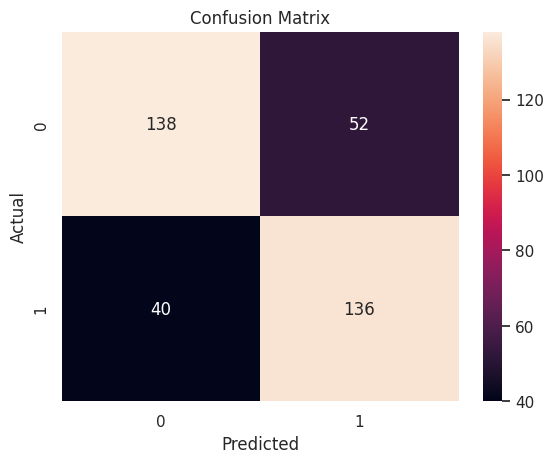

Classification Accuracy: 0.7486338797814208
Classification Error: 0.2513661202185792
False Positive Rate: 0.2736842105263158
Precision: 0.723404255319149
AUC Score: 0.7495215311004785
Cross-validated AUC: 0.8070837249229509
First 10 predicted responses:
 [0 1 0 1 1 1 1 0 0 1]
First 10 predicted probabilities of class members:
 [[0.52204422 0.47795578]
 [0.00658124 0.99341876]
 [0.99080716 0.00919284]
 [0.00658124 0.99341876]
 [0.00658124 0.99341876]
 [0.00658124 0.99341876]
 [0.00879116 0.99120884]
 [0.99080716 0.00919284]
 [0.99080716 0.00919284]
 [0.39530477 0.60469523]]
First 10 predicted probabilities:
 [[0.47795578]
 [0.99341876]
 [0.00919284]
 [0.99341876]
 [0.99341876]
 [0.99341876]
 [0.99120884]
 [0.00919284]
 [0.00919284]
 [0.60469523]]


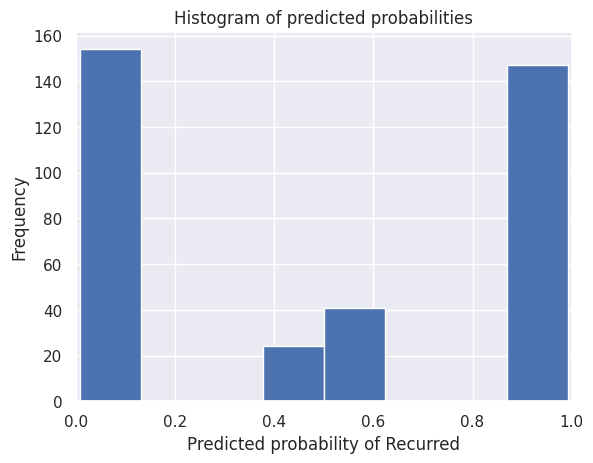

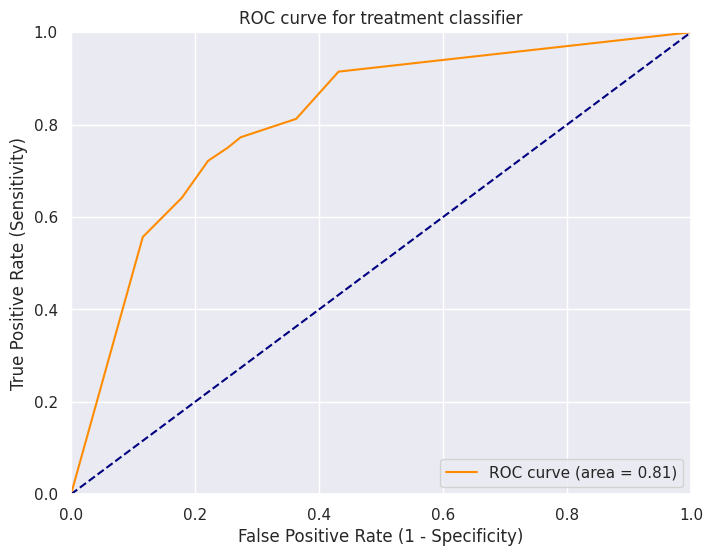

[[138  52]
 [ 40 136]]


In [ ]:
!pip install mlrose
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
from mlxtend.classifier import StackingClassifier

def stacking():
    # Building and fitting
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)

    print('########### Stacking ###############')

    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100

stacking()

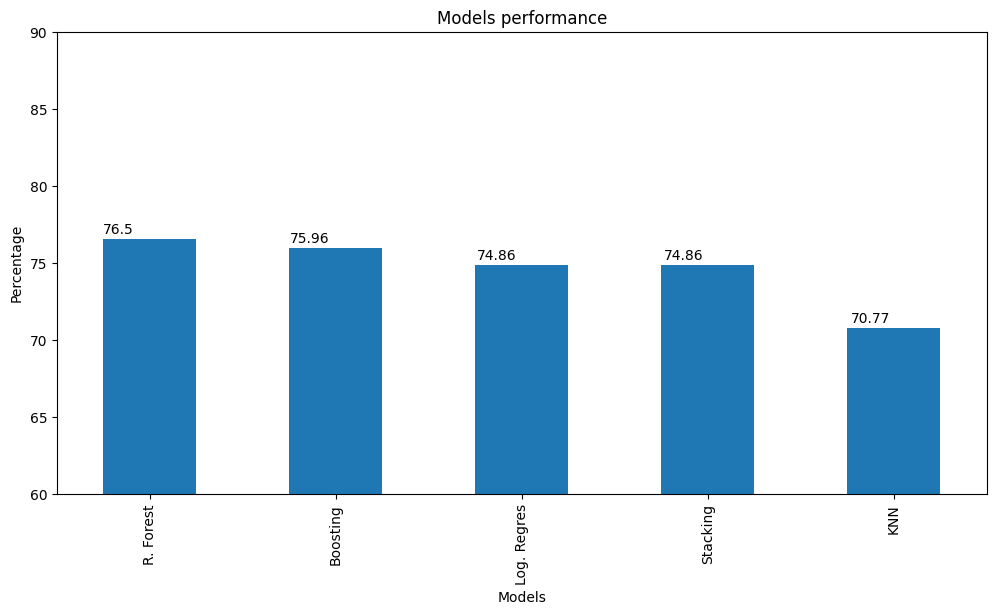

In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.xlabel('Models')
    plt.ylabel('Percentage')
    plt.title('Models performance')
    plt.savefig("Models performance.png", format='png', dpi=700, bbox_inches='tight')
    plt.show()

plotSuccess()

# 5. Explain the XGBClassifier model predictions with Shapley Values

In [ ]:
train_df = pd.read_csv('metabric_part1.csv')

In [ ]:
from patsy import dmatrices
y, X = dmatrices("Relapse_Free_Status ~ COHORT + AGE_AT_DIAGNOSIS + INFERRED_MENOPAUSAL_STATE + TUMOUR_CELLULARITY + HISTOLOGICAL_SUBTYPE + LYMPH_NODES_EXAMINED_POSITIVE + Nottingham_Prognostic_Index + ER_STATUS_IHC + HER2_STATUS_SNP6 + HORMONE_THERAPY + Integrative_Cluster + Overall_Survival_Months + Overall_Survival_Status + Pam50_Claudin_low_subtype + three_Gene_classifier_subtype + Patient_Vital_Status + Primary_Tumor_Laterality + RADIO_THERAPY + Type_of_Breast_Surgery + CHEMOTHERAPY + Relapse_Free_Status_Months",data=train_df)
X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

In [ ]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
import xgboost
model = xgboost.XGBClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
!pip install shap
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)
print(shap_values[10])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.6 MB/s eta 0:00:00
.values =
array([ 0.0000000e+00, -4.9205728e-02, -4.2791743e-02,  0.0000000e+00,
        6.4335555e-02,  8.7503716e-03, -2.2407708e-01,  1.4330295e-01,
        5.8853436e-02,  8.7912269e-02, -8.9410439e-02,  4.2014904e-02,
        5.8867960e+00, -4.3495741e-01,  1.8328007e-02, -1.7392967e-02,
       -1.2502838e+00,  4.2415410e-04,  1.0418755e-01, -5.9691906e-02,
        0.0000000e+00,  6.1908727e+00], dtype=float32)

.base_values =
-0.818846

.data =
array([  1.       ,   1.       ,  46.89     ,   1.       ,   2.       ,
         1.       ,   0.       ,   3.068    ,   1.       ,   2.       ,
         1.       ,   9.       , 148.0333333,   0.       ,   5.       ,
         1.       ,   2.       ,   1.       ,   1.       ,   1.       ,
         0.       ,  33.72     ])


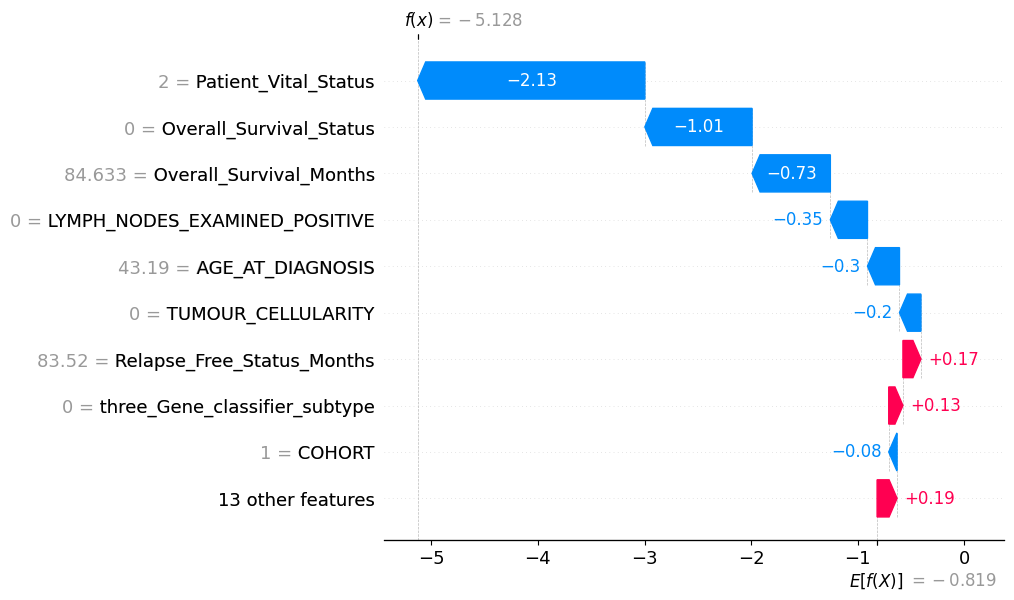

In [ ]:
shap.plots.waterfall(shap_values[0], show=False)
plt.savefig('waterfall shap values.png', format='png', dpi=700, bbox_inches='tight')
plt.show()

1.   f(x): is the prediction after considering all features.
2.   E[f(x)]: is the mean prediction.





*   The blue bar shows how much a particular feature decreases the value of the prediction.
*   The red bar shows how much a particular feature increases the value of the prediction.
*   Negative values imply probabilities of less than 0.5 that the participate needs a treatment.

**Visualize the overall impact of these features across multiple instances using SHAP summary plot:**



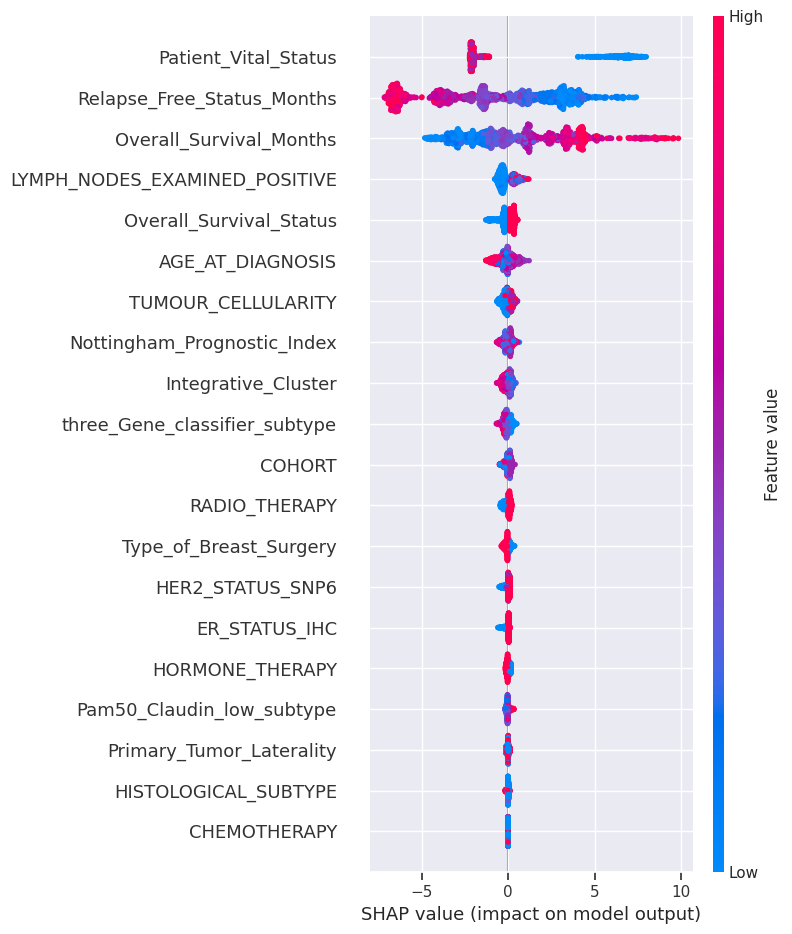

In [ ]:
shap.summary_plot(shap_values, X, show=False)
plt.savefig('shap_values_inpact_on_model.png', format='png', dpi=700, bbox_inches='tight')
plt.show()

The SHAP summary plot tells us the most important features and their range of effects over the dataset.

Feature importance: Variables are ranked in descending order.

From the plot above, we can gain some interesting insights into the model’s predictions:

In [ ]:
feature_cols = ['AGE_AT_DIAGNOSIS', 'INFERRED_MENOPAUSAL_STATE', 'TUMOUR_CELLULARITY', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Overall_Survival_Months', 'Overall_Survival_Status', 'three_Gene_classifier_subtype', 'Patient_Vital_Status',
                'RADIO_THERAPY', 'Type_of_Breast_Surgery', 'CHEMOTHERAPY', 'Relapse_Free_Status_Months']

Explainable Boosting Machines or **EBM**

EBM uses a framework called GA2M, which is a generalized additive model with an interaction function added to it.

Global explanations are useful for understanding what a model finds important, as well as identifying potential flaws in its decision making.

In [ ]:
!pip install interpret
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from imblearn.over_sampling import SMOTE
## Train Model
ebm = ExplainableBoostingClassifier()
X = train_df[feature_cols]
y = train_df.Relapse_Free_Status

sm = SMOTE()
X, y = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#X_train.design_info.column_names = X.design_info.column_names
ebm.fit(X_train, y_train)
## Calculate Global Explaination
ebm_global = ebm.explain_global()
## Plot Global Variable Importance
show(ebm_global)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=2838

**Local explainations**

In [ ]:
## Local explainations
ebm_local = ebm.explain_local(X_test, y_test)
#show(ebm.explain_local(X_test[:3], y_test[:3]), 0) to show a particular domain
show(ebm_local)

**Global feature importance plot using the SHAP bar plot**

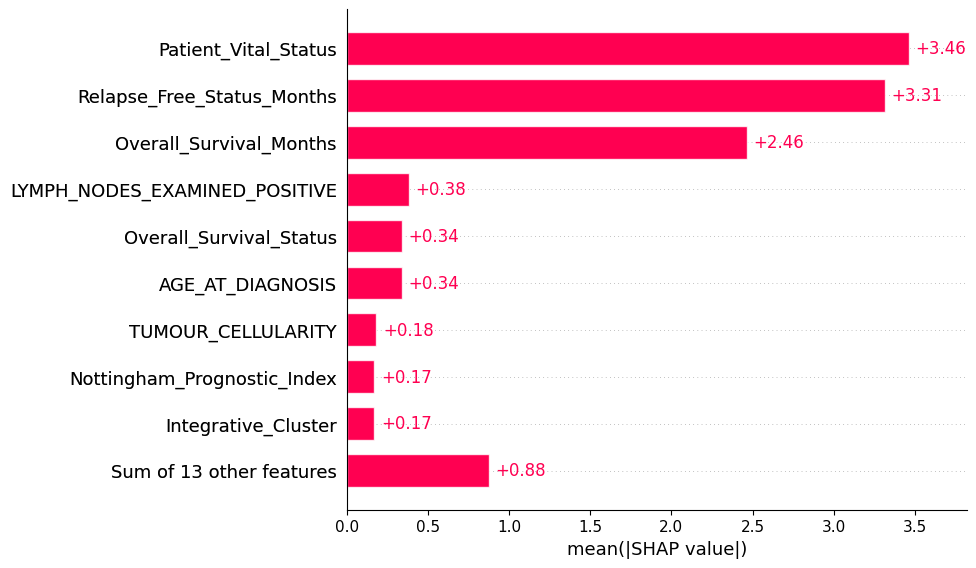

In [ ]:
shap.plots.bar(shap_values)

# 6. Explainable AI (XAI) with XGBClassifier model

In [ ]:
!pip install shap
!pip install lime
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import shap
shap.initjs()
import lime
import lime.lime_tabular
import matplotlib.pylab as pl
from sklearn.metrics import roc_auc_score

In [ ]:
## Train XGBoost Model
model = XGBClassifier(learning_rate = 0.05, verbosity = 1, n_estimators = 200 ,scale_pos_weight =4, random_state = 2456 )
model.fit(X_train, y_train)
## Predict
y_pred = model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.9720095693779904

**Feature importance plots**

The **Gain** implies the relative contribution of the corresponding feature to the model calculated by taking each feature's contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

The **Cover** metric means the relative number of observations related to this feature. For example, if you have 100 observations, 4 features and 3 trees, and suppose feature1 is used to decide the leaf node for 10, 5, and 2 observations in tree1, tree2 and tree3 respectively; then the metric will count cover for this feature as 10+5+2 = 17 observations. This will be calculated for all the 4 features and the cover will be 17 expressed as a percentage for all features' cover metrics.

The **Gain** is the most relevant attribute to interpret the relative importance of each feature.

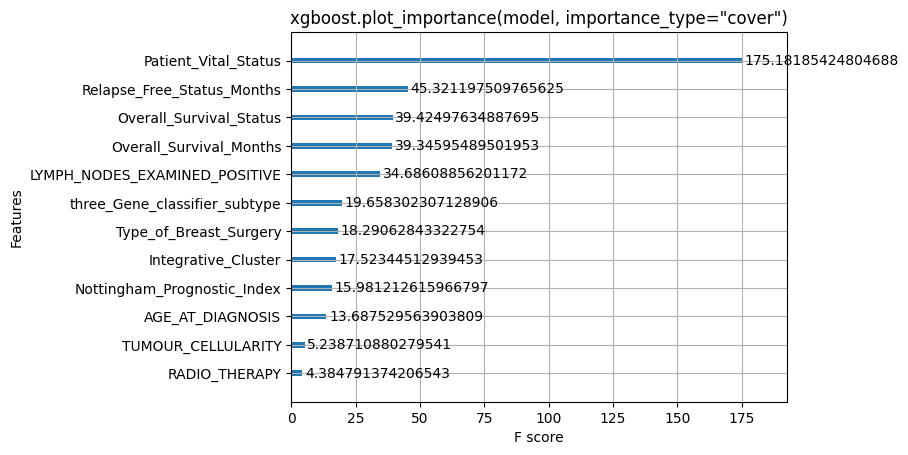

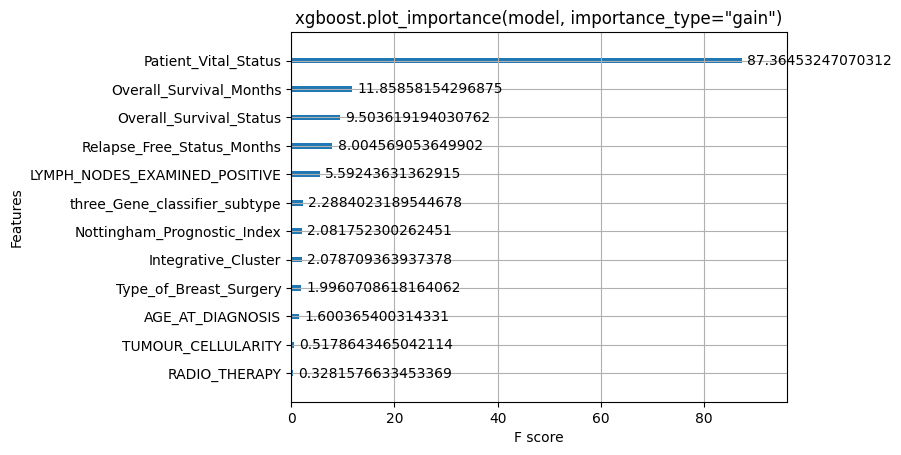

In [ ]:
## Plot importance (cover)
model.get_booster().feature_names
xgb.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()
## Plot importance (gain)
xgb.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
plt.savefig('xgboost.plot_importance(model, importance_type="gain").png', format='png', dpi=700, bbox_inches='tight')
pl.show()

**Local Interpretability**

Local interpretability of models consists of providing detailed explanations for why an individual prediction was made.

In [ ]:
model.fit(X_train.values, y_train)
predict_fn_xgb = lambda x: model.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names = X_train.columns)
exp = explainer.explain_instance(X_test.to_numpy()[90], predict_fn_xgb, num_features = X.shape[1]) #[186] first observation
exp.show_in_notebook()

In [ ]:
train_df.to_csv('metabric_part6.csv', index=False)
from google.colab import files
files.download("metabric_part6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7. Analysing observations' weightings

In [ ]:
import numpy as np
import pandas as pd
from patsy import dmatrices
train_df = pd.read_csv('metabric_part6.csv')

In [ ]:
y, X = dmatrices("Relapse_Free_Status ~ COHORT + AGE_AT_DIAGNOSIS + INFERRED_MENOPAUSAL_STATE + TUMOUR_CELLULARITY + HISTOLOGICAL_SUBTYPE + LYMPH_NODES_EXAMINED_POSITIVE + Nottingham_Prognostic_Index + ER_STATUS_IHC + HER2_STATUS_SNP6 + HORMONE_THERAPY + Integrative_Cluster + Overall_Survival_Months + Overall_Survival_Status + Pam50_Claudin_low_subtype + three_Gene_classifier_subtype + Patient_Vital_Status + Primary_Tumor_Laterality + RADIO_THERAPY + Type_of_Breast_Surgery + CHEMOTHERAPY + Relapse_Free_Status_Months",data=train_df)
X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
import xgboost
model = xgboost.XGBClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
#!pip install shap
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)

In [ ]:
lst_shap_values = list(shap_values)
cols = X_frame.shape[1]
X_frame['positive_weights'] = 0
X_frame['negative_weights'] = 0
X_frame['total_weights'] = 0

for index, row in X_frame.iterrows():
    pos_weight, neg_weight, tot_weight = 0,0,0
    for i in range(1,cols): # number of columns in X_frame
        f_weight = lst_shap_values[index].values[i]
        if f_weight > 0:
            pos_weight += f_weight
        else:
            neg_weight += f_weight
        tot_weight += abs(f_weight)

    X_frame['positive_weights'][index] = pos_weight
    X_frame['negative_weights'][index] = neg_weight
    X_frame['total_weights'][index] = tot_weight

Add label, patint_id to the matrix

In [ ]:
X_frame['Relapse_Free_Status'] = 0
X_frame['PATIENT_ID'] = 0
for index, row in X_frame.iterrows():
    for index2, row2 in train_df.iterrows():
        if row['COHORT'] == row2['COHORT'] and row['AGE_AT_DIAGNOSIS'] == row2['AGE_AT_DIAGNOSIS'] and row['INFERRED_MENOPAUSAL_STATE'] == row2['INFERRED_MENOPAUSAL_STATE'] and row['TUMOUR_CELLULARITY'] == row2['TUMOUR_CELLULARITY'] and row['HISTOLOGICAL_SUBTYPE'] == row2['HISTOLOGICAL_SUBTYPE'] and row['LYMPH_NODES_EXAMINED_POSITIVE'] == row2['LYMPH_NODES_EXAMINED_POSITIVE'] and row['Nottingham_Prognostic_Index'] == row2['Nottingham_Prognostic_Index'] and row['ER_STATUS_IHC'] == row2['ER_STATUS_IHC'] and row['HER2_STATUS_SNP6'] == row2['HER2_STATUS_SNP6'] and row['HORMONE_THERAPY'] == row2['HORMONE_THERAPY'] and row['Integrative_Cluster'] == row2['Integrative_Cluster'] and row['Overall_Survival_Months'] == row2['Overall_Survival_Months'] and row['Overall_Survival_Status'] == row2['Overall_Survival_Status'] and row['Pam50_Claudin_low_subtype'] == row2['Pam50_Claudin_low_subtype'] and row['three_Gene_classifier_subtype'] == row2['three_Gene_classifier_subtype'] and row['Patient_Vital_Status'] == row2['Patient_Vital_Status'] and row['Primary_Tumor_Laterality'] == row2['Primary_Tumor_Laterality'] and row['RADIO_THERAPY'] == row2['RADIO_THERAPY'] and row['Type_of_Breast_Surgery'] == row2['Type_of_Breast_Surgery'] and row['CHEMOTHERAPY'] == row2['CHEMOTHERAPY'] and row['Relapse_Free_Status_Months'] == row2['Relapse_Free_Status_Months']:
            X_frame['Relapse_Free_Status'][index] = train_df['Relapse_Free_Status'][index2]
            X_frame['PATIENT_ID'][index] = train_df['PATIENT_ID'][index2]
            break

X_frame = X_frame.set_index('PATIENT_ID')
X_frame = X_frame.reset_index()

In [ ]:
X_frame

PATIENT_ID  Intercept  COHORT  AGE_AT_DIAGNOSIS  \
0              2        1.0     1.0             43.19   
1              8        1.0     1.0             76.97   
2             10        1.0     1.0             78.77   
3             28        1.0     1.0             86.41   
4             35        1.0     1.0             84.22   
...          ...        ...     ...               ...   
1514        7278        1.0     4.0             67.89   
1515        7280        1.0     4.0             63.50   
1516        7284        1.0     4.0             61.23   
1517        7286        1.0     4.0             66.48   
1518        7295        1.0     4.0             43.10   

      INFERRED_MENOPAUSAL_STATE  TUMOUR_CELLULARITY  HISTOLOGICAL_SUBTYPE  \
0                           1.0                 0.0                   0.0   
1                           0.0                 0.0                   3.0   
2                           0.0                 2.0                   0.0   
3                           0.0                 2.0                   0.0   
4                           0.0                 0.0                   1.0   
...                         ...                 ...                   ...   
1514                        0.0                 0.0                   0.0   
1515                        0.0                 0.0                   0.0   
1516                        0.0                 0.0                   0.0   
1517                        0.0                 0.0                   0.0   
1518                        1.0                 0.0                   1.0   

      LYMPH_NODES_EXAMINED_POSITIVE  Nottingham_Prognostic_Index  \
0                               0.0                        4.020   
1                               8.0                        6.080   
2                               0.0                        4.062   
3                               1.0                        5.032   
4                               0.0                        3.056   
...                             ...                          ...   
1514                            1.0                        4.030   
1515                            6.0                        5.080   
1516                            1.0                        5.030   
1517                            3.0                        5.050   
1518                            1.0                        5.050   

      ER_STATUS_IHC  ...  Patient_Vital_Status  Primary_Tumor_Laterality  \
0               1.0  ...                   2.0                       1.0   
1               1.0  ...                   0.0                       1.0   
2               1.0  ...                   0.0                       0.0   
3               1.0  ...                   1.0                       1.0   
4               0.0  ...                   0.0                       0.0   
...             ...  ...                   ...                       ...   
1514            1.0  ...                   1.0                       0.0   
1515            1.0  ...                   2.0                       0.0   
1516            1.0  ...                   1.0                       1.0   
1517            1.0  ...                   1.0                       0.0   
1518            1.0  ...                   2.0                       1.0   

      RADIO_THERAPY  Type_of_Breast_Surgery  CHEMOTHERAPY  \
0               1.0                     0.0           0.0   
1               1.0                     1.0           1.0   
2               1.0                     1.0           0.0   
3               1.0                     0.0           0.0   
4               0.0                     1.0           0.0   
...             ...                     ...           ...   
1514            0.0                     1.0           0.0   
1515            0.0                     1.0           0.0   
1516            0.0                     1.0           0.0   
1517            0.0                     1.0           0.

**This part executes from Spyder**

In [ ]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import random

adjacency_edges = []

def update_edge_connections():
  dic_adj ={}
  for idx, rowi in X_frame.iterrows():
      neg_val = rowi['negative_weights']
      pos_val = rowi['positive_weights']
      classi = rowi['Relapse_Free_Status']
      patient_id = rowi['PATIENT_ID']
      min_val = get_edges(neg_val,pos_val,classi, patient_id)
      dic_adj = [int(rowi['PATIENT_ID']),min_val]

      adjacency_edges.append(dic_adj)
      print(dic_adj)
  return adjacency_edges


def get_edges(neg_val, pos_val, classi, patient_id):
    neg_dic = {}
    pos_dic = {}
    # GNN parameters ---------
    node_connections = 5
    node_threshold = 0.04
    adjacents = []
    count = 0
    sum = 0 # Initalise the mean of all nodes connected togother
    for jdx, rowj in X_frame.iterrows():
        if classi == 0 and rowj['Relapse_Free_Status'] == 0:
            neg_dic[int(rowj['PATIENT_ID'])] = abs(rowj['negative_weights'])
        elif classi == 1 and rowj['Relapse_Free_Status'] == 1:
            pos_dic[int(rowj['PATIENT_ID'])] = rowj['positive_weights']

    if classi == 0:
        neg_dic = dict(sorted(neg_dic.items(), key=lambda item: item[1]))
        for i, v in neg_dic.items():
            if abs(neg_val) < v and i != patient_id:
                if len(adjacents) >= node_connections:
                    break
                if count > 1 and abs(v - (sum/count)) > node_threshold:
                    break

                adjacents.append(i)
                count += 1
                sum += v
    elif classi == 1:
        pos_dic = dict(sorted(pos_dic.items(), key=lambda item: item[1]))
        for i, v in pos_dic.items():
            if pos_val < v and i != patient_id:
                if len(adjacents) >= node_connections:
                    break
                if count > 1 and abs(v - (sum/count)) > node_threshold:
                    break

                adjacents.append(i)
                count += 1
                sum += v

    return adjacents
ad_edges = update_edge_connections()

[2, [4719, 258]]
[8, [5431, 5188, 6011, 5057, 4171]]
[10, [4945, 5335, 115, 656, 506]]
[28, [3211, 6077, 199, 4139, 2933]]
[35, [3402, 123, 7020, 5383, 7107]]
[36, [5350, 102, 6238, 5562, 5596]]
[50, [895, 4729, 7041, 5499, 4770]]
[60, [5617, 7077, 2834, 5414, 7005]]
[66, [5236, 3295, 320, 322, 5597]]
[100, [5425, 5491, 5120, 4834, 5426]]
[101, [3487, 4120]]
[102, [6238, 5562, 5596, 291]]
[106, [135, 5284, 509, 4818, 7109]]
[111, [436, 596, 6149, 4942, 5408]]
[112, [4670, 5518, 5534, 598, 398]]
[113, [451, 171, 5519, 130, 5119]]
[114, [5525, 7181, 6092, 6245, 2844]]
[115, [656, 506, 3083, 4956, 6305]]
[116, [6337, 6007, 4230, 382, 2774]]
[117, [7151, 507]]
[119, [247, 5510, 5455, 4639, 5579]]
[120, [5173, 314, 5058, 5472, 368]]
[121, [6231, 133, 2835, 7127, 525]]
[122, [418, 5281, 437, 462, 218]]
[123, [7020, 5383, 7107, 395, 6218]]
[124, [869, 5432, 7104, 5583, 7048]]
[125, [273, 5441, 140, 5060, 5560]]
[126, [882, 204, 3357, 5280, 319]]
[128, [6017, 3403, 588, 587, 348]]
[129, [4687,

In [ ]:
# Create adjecancy matrix
ad_matrix = pd.DataFrame(columns=['source','target'])

for i in range(len(ad_edges)):
    source = ad_edges[i][0]
    for  j in range(len(ad_edges[i][1])):
        ad_matrix.loc[len(ad_matrix)] = [source, ad_edges[i][1][j]]


ad_matrix.head(10)

source  target
0       2    4719
1       2     258
2       8    5431
3       8    5188
4       8    6011
5       8    5057
6       8    4171
7      10    4945
8      10    5335
9      10     115

In [ ]:
X_frame = X_frame.drop(['Intercept','positive_weights','negative_weights','total_weights'], axis=1)
X_frame.head(10)

PATIENT_ID  COHORT  AGE_AT_DIAGNOSIS  INFERRED_MENOPAUSAL_STATE  \
0           2     1.0             43.19                        1.0   
1           8     1.0             76.97                        0.0   
2          10     1.0             78.77                        0.0   
3          28     1.0             86.41                        0.0   
4          35     1.0             84.22                        0.0   
5          36     1.0             85.49                        0.0   
6          50     1.0             44.64                        1.0   
7          60     1.0             45.43                        1.0   
8          66     1.0             61.49                        0.0   
9         100     1.0             68.68                        0.0   

   TUMOUR_CELLULARITY  HISTOLOGICAL_SUBTYPE  LYMPH_NODES_EXAMINED_POSITIVE  \
0                 0.0                   0.0                            0.0   
1                 0.0                   3.0                            8.0   
2                 2.0                   0.0                            0.0   
3                 2.0                   0.0                            1.0   
4                 0.0                   1.0                            0.0   
5                 2.0                   0.0                            0.0   
6                 2.0                   3.0                            3.0   
7                 0.0                   0.0                            0.0   
8                 0.0                   0.0                            1.0   
9                 1.0                   0.0                            0.0   

   Nottingham_Prognostic_Index  ER_STATUS_IHC  HER2_STATUS_SNP6  ...  \
0                        4.020            1.0               2.0  ...   
1                        6.080            1.0               2.0  ...   
2                        4.062            1.0               2.0  ...   
3                        5.032            1.0               0.0  ...   
4                        3.056            0.0               1.0  ...   
5                        3.044            1.0               2.0  ...   
6                        4.066            1.0               2.0  ...   
7                        4.046            1.0               2.0  ...   
8                        4.032            1.0               2.0  ...   
9                        4.078            0.0               2.0  ...   

   Overall_Survival_Status  Pam50_Claudin_low_subtype  \
0                      0.0                        2.0   
1                      1.0                        3.0   
2                      1.0                        3.0   
3                      1.0                        3.0   
4                      1.0                        1.0   
5                      1.0                        2.0   
6                      0.0                        5.0   
7                      0.0                        3.0   
8                      0.0                        3.0   
9                      1.0                        0.0   

   three_Gene_classifier_subtype  Patient_Vital_Status  \
0                            0.0                   2.0   
1                            0.0                   0.0   
2                            0.0                   0.0   
3                            0.0                   1.0   
4                            0.0                   0.0   
5                            1.0                   0.0   
6                            1.0                   2.0   
7                            0.0                   2.0   
8                            0.0                   2.0   
9                            2.0                   0.0   

   Primary_Tumor_Laterality  RADIO_THERAPY  Type_of_Breast_Surgery  \
0                       1.0            1.0                     0.0   
1                       1.0            1.0                     1.0   
2                       0.0            1.0                     1.0   
3                       1.0      

In [ ]:
X_frame.to_csv('metabric_part7.csv', index=False)
from google.colab import files
files.download("metabric_part7.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ad_matrix.to_csv('adjacency_matrix.csv', index=False)
from google.colab import files
files.download("adjacency_matrix.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training and Evaluating with Feedforward Network + GraphConvLayer - using (Keras + GNN)

In [ ]:
#!pip install pip install tensorflow
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd
metabric_df = pd.read_csv('metabric_part7.csv')

import pandas as pd
ad_matrix = pd.read_csv('adjacency_matrix.csv')

In [ ]:
print(metabric_df.Relapse_Free_Status.value_counts())

0    913
1    606
Name: Relapse_Free_Status, dtype: int64


In [ ]:
class_values = sorted(metabric_df["Relapse_Free_Status"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
patient_idx = {name: idx for idx, name in enumerate(sorted(metabric_df["PATIENT_ID"].unique()))}

metabric_df["PATIENT_ID"] = metabric_df["PATIENT_ID"].apply(lambda name: patient_idx[name])
ad_matrix["source"] = ad_matrix["source"].apply(lambda name: patient_idx[name])
ad_matrix["target"] = ad_matrix["target"].apply(lambda name: patient_idx[name])
metabric_df["Relapse_Free_Status"] = metabric_df["Relapse_Free_Status"].apply(lambda value: class_idx[value])

<ipython-input-5-c345784d752b>:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  metabric_df.sort_values("PATIENT_ID")[feature_names].to_numpy(), dtype=tf.dtypes.float32


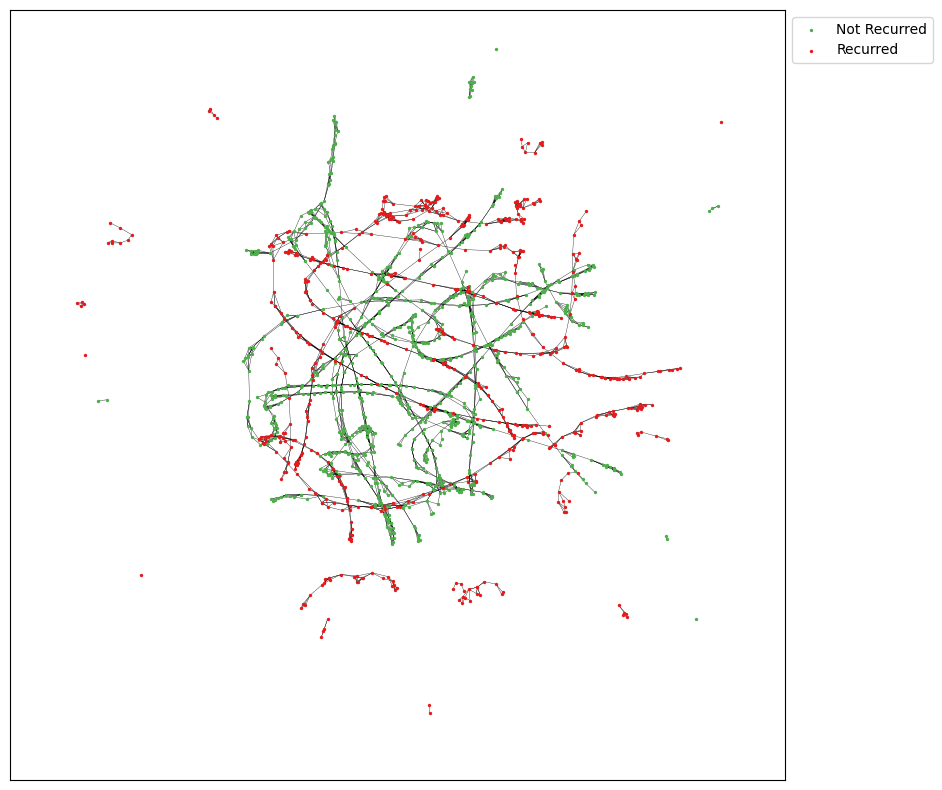

In [ ]:
!pip install torch_geometric
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

feature_cols = ['Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']
feature_names = set(feature_cols)
label_dict = {
    0:'Not Recurred',
    1:'Recurred'}
labels = metabric_df['Relapse_Free_Status']
edges = torch.from_numpy(ad_matrix[["source", "target"]].to_numpy().T)
node_features = tf.cast(
    metabric_df.sort_values("PATIENT_ID")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
data = Data(x=node_features, edge_index=edges, y=labels)
data['num_nodes'] = metabric_df.shape[0]

G = to_networkx(data, to_undirected=True)
node_color = []
nodelist = [[], []]
colorlist = [ '#4daf4a','#e41a1c']
labels = data.y
for n, i in enumerate(labels):
    node_color.append(colorlist[i])
    nodelist[i].append(n)
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = list(label_dict.values())
for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 2, node_color = colorlist[num], label=l)
plt.savefig("GraphX-Net's graph.png", format='png', dpi=700, bbox_inches='tight')
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

'\nplt.figure(figsize=(10, 10))\ncolors = papers["subject"].tolist()\ncora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))\nsubjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])\nnx.draw_spring(cora_graph, node_size=15, node_color=subjects)\n'

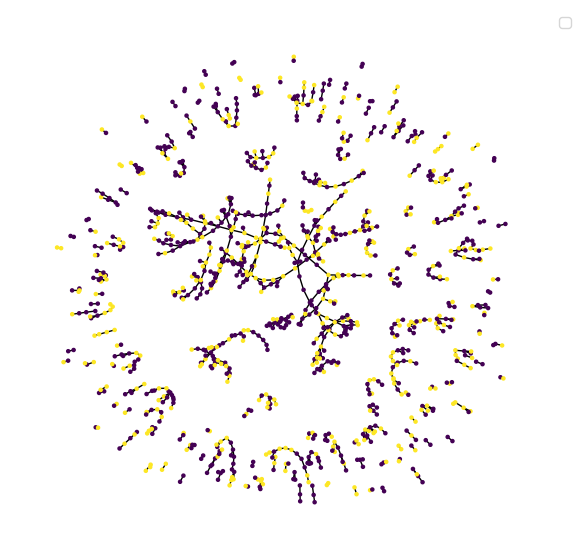

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# For color mapping
import matplotlib.colors as colors
import matplotlib.cm as cmx

plt.figure(figsize=(7, 7))
colors = metabric_df["Relapse_Free_Status"].tolist()

breast_graph = nx.from_pandas_edgelist(ad_matrix.sample(n=1000))
clases = list(metabric_df[metabric_df["PATIENT_ID"].isin(list(breast_graph.nodes))]["Relapse_Free_Status"])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
nx.draw_spring(breast_graph, node_size=5, node_color=clases)
plt.savefig("Draw sprint GraphX-Net's graph.png", format='png', dpi=700, bbox_inches='tight')
"""
plt.figure(figsize=(10, 10))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)
"""

In [ ]:
train_data, test_data = [], []
for _, group_data in metabric_df.groupby("Relapse_Free_Status"):
    # Select around 60% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.6
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (935, 23)
Test data shape: (584, 23)


In [ ]:
hidden_units = [32, 32]
learning_rate = 0.01 # 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 128  #256

In [ ]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.savefig("Learning curve.png", format='png', dpi=700, bbox_inches='tight')
    plt.show()

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
###### Shaply values just positive features includeded as inputs ############################

feature_cols = ['Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']

feature_names = set(feature_cols)
num_features = len(feature_names)
num_classes = len(class_idx)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
metabric_df[list(feature_names)] = scaler.fit_transform(metabric_df[list(feature_names)])
metabric_df.head()

# split into input (X) and output (Y) variables
X = metabric_df[feature_cols]
y = metabric_df['Relapse_Free_Status']

# Create train and test features as a numpy array.
x_train = train_data[list(feature_names)].to_numpy()
x_test = test_data[list(feature_names)].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["Relapse_Free_Status"]
y_test = test_data["Relapse_Free_Status"]


In [ ]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 9)]                  0         []                            
 )                                                                                                
                                                                                                  
 ffn_block1 (Sequential)     (None, 32)                   1540      ['input_features[0][0]']      
                                                                                                  
 ffn_block2 (Sequential)     (None, 32)                   2368      ['ffn_block1[0][0]']          
                                                                                                  
 skip_connection2 (Add)      (None, 32)                   0         ['ffn_block1[0][0]',   

In [ ]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
7/7 [==============================] - 9s 100ms/step - loss: 1.3531 - acc: 0.6108 - val_loss: 2.7199 - val_acc: 0.4043
Epoch 2/300
7/7 [==============================] - 0s 21ms/step - loss: 0.9168 - acc: 0.6398 - val_loss: 0.7294 - val_acc: 0.6596
Epoch 3/300
7/7 [==============================] - 0s 16ms/step - loss: 0.7696 - acc: 0.6990 - val_loss: 0.5001 - val_acc: 0.8156
Epoch 4/300
7/7 [==============================] - 0s 18ms/step - loss: 0.6473 - acc: 0.6902 - val_loss: 0.5080 - val_acc: 0.8014
Epoch 5/300
7/7 [==============================] - 0s 19ms/step - loss: 0.5973 - acc: 0.7406 - val_loss: 0.4768 - val_acc: 0.8227
Epoch 6/300
7/7 [==============================] - 0s 18ms/step - loss: 0.5338 - acc: 0.7569 - val_loss: 0.5109 - val_acc: 0.8085
Epoch 7/300
7/7 [==============================] - 0s 16ms/step - loss: 0.5314 - acc: 0.7418 - val_loss: 0.4366 - val_acc: 0.8085
Epoch 8/300
7/7 [==============================] - 0s 15ms/step - loss: 0.5110 - acc: 0.7

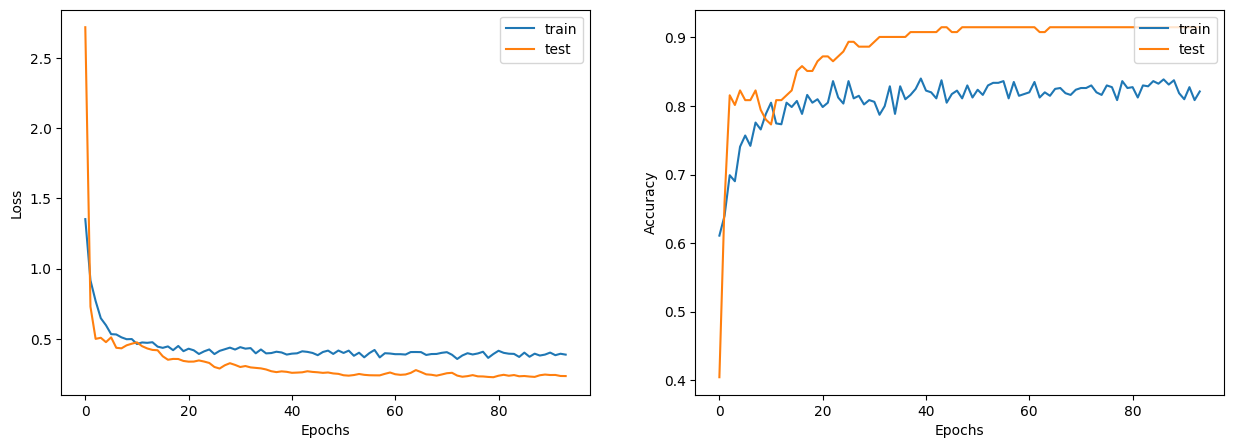

In [ ]:
display_learning_curves(history)

In [ ]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 92.81%


In [ ]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)

def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")

In [ ]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
plt.figure(figsize=(10, 10))
colors = metabric_df["Relapse_Free_Status"].tolist()

breast_cancer = ad_matrix[['source','target']].sample(n=1000)
display_class_probabilities(probabilities)

1/1 [==============================] - 1s 634ms/step
Instance 1:
- 0: 72.49%
- 1: 27.51%
Instance 2:
- 0: 55.63%
- 1: 44.37%


<Figure size 1000x1000 with 0 Axes>

In [ ]:
probabilities

array([[0.7248668 , 0.27513325],
       [0.55627567, 0.4437244 ]], dtype=float32)

In [ ]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = ad_matrix[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    metabric_df.sort_values("PATIENT_ID")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 7110)
Nodes shape: (1519, 9)


<ipython-input-28-c823b1ea524e>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  metabric_df.sort_values("PATIENT_ID")[feature_names].to_numpy(), dtype=tf.dtypes.float32


In [ ]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [ ]:
class GraphXNet(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [ ]:
gnn_model = GraphXNet(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GraphX-Net",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.0146596  -0.05304438]
 [-0.04544139 -0.01654628]
 [ 0.05540429 -0.07592307]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (1519, 32)                1540      
                                                                 
 graph_conv1 (GraphConvLaye  multiple                  5888      
 r)                                                              
                                                                 
 graph_conv2 (GraphConvLaye  multiple                  5888      
 r)                                                              
                                                                 
 postprocess (Sequential)    (1519, 32)                2368      
                                                                 
 logits (Dense)              multiple           

In [ ]:
x_train = train_data.PATIENT_ID.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/300
7/7 [==============================] - 11s 174ms/step - loss: 0.7813 - acc: 0.5554 - val_loss: 0.6618 - val_acc: 0.5957
Epoch 2/300
7/7 [==============================] - 1s 79ms/step - loss: 0.6765 - acc: 0.6373 - val_loss: 0.6406 - val_acc: 0.6099
Epoch 3/300
7/7 [==============================] - 1s 81ms/step - loss: 0.6048 - acc: 0.6877 - val_loss: 0.6030 - val_acc: 0.8652
Epoch 4/300
7/7 [==============================] - 1s 79ms/step - loss: 0.5368 - acc: 0.7443 - val_loss: 0.5127 - val_acc: 0.8652
Epoch 5/300
7/7 [==============================] - 1s 86ms/step - loss: 0.5217 - acc: 0.7569 - val_loss: 0.4753 - val_acc: 0.8440
Epoch 6/300
7/7 [==============================] - 1s 89ms/step - loss: 0.5125 - acc: 0.7657 - val_loss: 0.4878 - val_acc: 0.8085
Epoch 7/300
7/7 [==============================] - 1s 80ms/step - loss: 0.4462 - acc: 0.7897 - val_loss: 0.4893 - val_acc: 0.7801
Epoch 8/300
7/7 [==============================] - 1s 76ms/step - loss: 0.4674 - acc: 0.

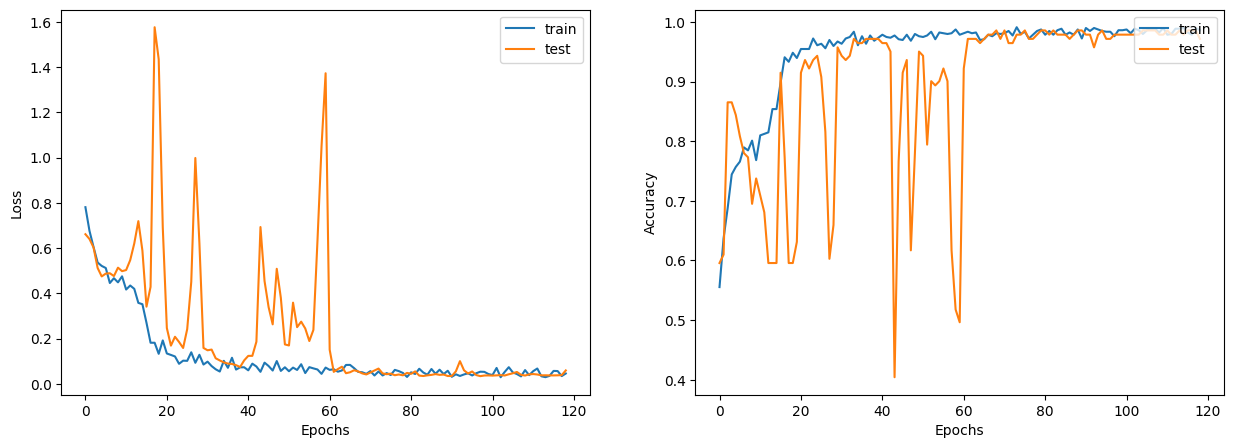

In [ ]:
display_learning_curves(history)

In [ ]:
weights = gnn_model.get_weights()
weights

[array([0.6252056 , 0.6347061 , 0.5118987 , 1.2044975 , 0.4216943 ,
        0.5231436 , 1.704937  , 0.98467803, 0.7885058 ], dtype=float32),
 array([-0.23925507,  0.06701524,  0.12485494,  0.10350817, -0.00611199,
         0.09573074,  0.6453494 , -0.2182407 , -0.00696519], dtype=float32),
 array([0.0471098 , 0.5109305 , 0.5239974 , 0.33979744, 0.42915   ,
        0.55987954, 0.55260414, 0.56240183, 0.37167186], dtype=float32),
 array([0.01663814, 0.10699616, 0.03827182, 0.06217474, 0.22324072,
        0.05269415, 0.1912278 , 0.2514155 , 0.05735295], dtype=float32),
 array([[ 2.71059424e-01, -3.28120649e-01, -3.96897227e-01,
         -3.74771565e-01,  1.51795447e-01,  1.59909025e-01,
         -1.15536630e-01,  3.12502570e-02,  1.51087940e-01,
         -5.49320467e-02, -4.11759555e-01, -3.54060344e-02,
         -1.45770639e-01, -8.85137022e-02, -2.60887146e-01,
         -1.25350818e-01,  2.35425293e-01, -1.99467704e-01,
         -1.41163766e-01,  4.39749241e-01,  1.23191714e-01,
       

In [ ]:
x_test = test_data.PATIENT_ID.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 98.8%


# Keras GNN Cross-validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow import keras


# Prepare your data (X and y)

feature_cols = ['PATIENT_ID' ,'Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']
X = metabric_df[feature_cols]
y = metabric_df['Relapse_Free_Status']

# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to store the evaluation results
accuracy_scores = []

# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    x_train = X_train.PATIENT_ID.to_numpy()
    gnn_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

    # Evaluate the model on the test data
    x_test = X_test.PATIENT_ID.to_numpy()
    y_pred = gnn_model.predict(x_test, verbose=1)
    y_pred = np.argmax(y_pred, axis=1)

    #y_test = y_test[:len(y_pred)]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation:", np.std(accuracy_scores))



Epoch 1/10
38/38 [==============================] - 3s 66ms/step - loss: 0.0529 - acc: 0.9819
Epoch 2/10
38/38 [==============================] - 3s 67ms/step - loss: 0.0698 - acc: 0.9737
Epoch 3/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0718 - acc: 0.9778
Epoch 4/10
38/38 [==============================] - 3s 75ms/step - loss: 0.0843 - acc: 0.9786
Epoch 5/10
38/38 [==============================] - 3s 91ms/step - loss: 0.0957 - acc: 0.9712
Epoch 6/10
38/38 [==============================] - 2s 62ms/step - loss: 0.0717 - acc: 0.9770
Epoch 7/10
38/38 [==============================] - 2s 65ms/step - loss: 0.0819 - acc: 0.9720
Epoch 8/10
38/38 [==============================] - 2s 63ms/step - loss: 0.0732 - acc: 0.9712
Epoch 9/10
38/38 [==============================] - 2s 63ms/step - loss: 0.0621 - acc: 0.9770
Epoch 10/10
10/10 [==============================] - 1s 13ms/step
Epoch 1/10
38/38 [==============================] - 2s 66ms/step - loss: 0.0599 - acc: 0

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
import numpy as np
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

# 0.1 , 1
# Assume you have two sets of predictions from your GNN model
predictions_group1 = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
predictions_group2 = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) # waiting next time of running

# Perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = stats.ttest_ind(predictions_group1, predictions_group2)
# Print the calculated p-value
print("p-value:", p_value)

f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy:", balanced_acc)

p-value: 0.9343318133366997
F1 score: 0.983739837398374
Balanced accuracy: 0.989010989010989


Calculate the AUC

In [ ]:
from sklearn.metrics import roc_auc_score

logits = gnn_model(x_test)
probabilities = tf.nn.softmax(logits)

probabilities = np.argmax(probabilities, axis=1)

# Assuming `predicted_probs` contains the predicted probabilities and `labels` contains the ground truth labels
auc = roc_auc_score(y_test, probabilities)

print("AUC:", auc)

AUC: 0.9890109890109889


Learning Rate adjustment

In [ ]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming you have your graph data and labels in the form of NumPy arrays
# x_train: Feature matrix of shape (num_samples, num_features)
# y_train: Labels/targets of shape (num_samples,)

#input_shape = x_train.shape[1:]  # Shape of input features

#gnn_model = create_gnn_model(input_shape)

# Compile the model with an initial learning rate (use a relatively small value)
initial_lr = 0.01
gnn_model.compile(optimizer=Adam(learning_rate=initial_lr), loss=tf.keras.losses.MeanSquaredError())


Epoch 1/2
38/38 [==============================] - 10s 63ms/step - loss: 6.0079
Epoch 2/2
38/38 [==============================] - 2s 63ms/step - loss: 0.2376
Losses [36.568782806396484, 34.146907806396484, 32.6320915222168, 30.11189842224121, 26.18166732788086, 25.530851364135742, 23.914337158203125, 22.30120086669922, 20.638324737548828, 19.078861236572266, 17.751142501831055, 16.586503982543945, 15.538110733032227, 14.630952835083008, 13.78754711151123, 13.029004096984863, 12.363452911376953, 11.75350284576416, 11.183509826660156, 10.699516296386719, 10.249354362487793, 9.884221076965332, 9.524495124816895, 9.152552604675293, 8.802626609802246, 8.514189720153809, 8.220438957214355, 7.958702087402344, 7.710662841796875, 7.484571933746338, 7.256319999694824, 7.04464054107666, 6.847745418548584, 6.66076135635376, 6.4815263748168945, 6.313257694244385, 6.162888050079346, 6.007938385009766, 0.328982949256897, 0.3712630867958069, 0.3650064766407013, 0.36638927459716797, 0.3599970936775207

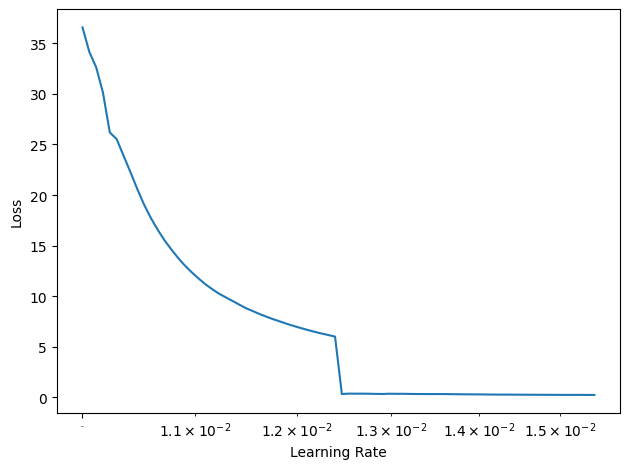

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

num_samples = train_data.shape[0]

# Define a custom callback to record learning rate and loss values during training
class LRFinder(LambdaCallback):
    def __init__(self, start_lr=0.01, end_lr=2, num_samples=num_samples):
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.num_samples = num_samples
        self.learning_rates = np.geomspace(start_lr, end_lr, num_samples)
        self.losses = []
        self.error = []

    def on_batch_end(self, batch, logs=None):
        # Track the loss for each batch
        self.losses.append(logs['loss'])

    def on_train_end(self, logs=None):
        # Plot the learning rate vs. loss graph
        print('Losses',  self.losses)
        import matplotlib.pyplot as plt
        x = self.learning_rates[:len(self.losses)]
        y = self.losses
        plt.plot(x,y )
        plt.rcParams["figure.autolayout"] = True
        plt.xlabel('Learning Rate')
        plt.ylabel('Loss')
        plt.xscale('log')
        plt.xticks(fontsize=.1)
        plt.savefig("Learning rate tunes.png", format='png', dpi=700, bbox_inches='tight')

        plt.show()

# Run the learning rate finder
lr_finder = LRFinder(start_lr=0.01, end_lr=2, num_samples=num_samples)
gnn_model.fit(x_train, y_train, batch_size=32, epochs=2, callbacks=[lr_finder])

# Libraries for Neural Networks - PyTorch



In [ ]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.5.0+cu101 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.5.0+cu101


Loading the dataset

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [ ]:
df = pd.read_csv('metabric_part7.csv')

In [ ]:
feature_cols = ['Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']
inputs = df[feature_cols].values
inputs

array([[ 83.52      ,  84.63333333,   0.        , ...,   4.02      ,
          4.        ,   2.        ],
       [ 18.55      ,  41.36666667,   8.        , ...,   6.08      ,
         10.        ,   0.        ],
       [  2.89      ,   7.8       ,   0.        , ...,   4.062     ,
          8.        ,   0.        ],
       ...,
       [146.97      , 203.        ,   1.        , ...,   5.03      ,
          7.        ,   1.        ],
       [156.55      , 158.6333333 ,   3.        , ...,   5.05      ,
          3.        ,   1.        ],
       [194.28      , 196.8666667 ,   1.        , ...,   5.05      ,
          3.        ,   2.        ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)
inputs

array([[0.2561806 , 0.25089038, 0.        , ..., 0.56179775, 0.4       ,
        1.        ],
       [0.05689835, 0.12247725, 0.19512195, ..., 0.94756554, 1.        ,
        0.        ],
       [0.00886449, 0.02285319, 0.        , ..., 0.56966292, 0.8       ,
        0.        ],
       ...,
       [0.45080056, 0.60219628, 0.02439024, ..., 0.75093633, 0.7       ,
        0.5       ],
       [0.48018526, 0.4705184 , 0.07317073, ..., 0.75468165, 0.3       ,
        0.5       ],
       [0.59591436, 0.58399288, 0.02439024, ..., 0.75468165, 0.3       ,
        1.        ]])

In [ ]:
outputs = df['Relapse_Free_Status'].values
outputs

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
target_names = ['Not Recurred','Recurred']

In [ ]:
inputs.shape

(1519, 9)

In [ ]:
outputs.shape

(1519,)

Data transformation


In [ ]:
import torch

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.3)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_train = y_train.unsqueeze(1)

In [ ]:
type(X_train)

torch.Tensor

In [ ]:
y_train.shape

torch.Size([1063, 1])

In [ ]:
X_train.shape

torch.Size([1063, 9])

In [ ]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

Neural network structure

In [ ]:
(9 + 1) / 2

5.0

In [ ]:
# 9 -> 5 -> 5 -> 1
network = nn.Sequential(nn.Linear(in_features=9, out_features=5),
                        nn.Sigmoid(),
                        nn.Linear(5, 5),
                        nn.Sigmoid(),
                        nn.Linear(5, 1),
                        nn.Sigmoid())

In [ ]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=9, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
outputs

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
loss_function = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.01)

In [ ]:
epochs = 100
for epoch in range(epochs):
  running_loss = 0

  for data in train_loader:
    inp, out = data
    #print(inputs)
    #print('-----')
    #print(outputs)
    optimizer.zero_grad()

    predictions = network.forward(inp)
    loss = loss_function(predictions, out)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(running_loss / len(train_loader)))

Epoch: 1 loss: 0.6497978456666537
Epoch: 2 loss: 0.4961881456531097
Epoch: 3 loss: 0.35408048638116535
Epoch: 4 loss: 0.2917165862761925
Epoch: 5 loss: 0.26404031031878195
Epoch: 6 loss: 0.25021914768720344
Epoch: 7 loss: 0.24170647544142243
Epoch: 8 loss: 0.23567327735162227
Epoch: 9 loss: 0.2310576211904811
Epoch: 10 loss: 0.22734404198616465
Epoch: 11 loss: 0.22423200699213508
Epoch: 12 loss: 0.22153524177096715
Epoch: 13 loss: 0.2191323282144894
Epoch: 14 loss: 0.2169428445120281
Epoch: 15 loss: 0.21491909469260234
Epoch: 16 loss: 0.21303817213765372
Epoch: 17 loss: 0.2112900979085782
Epoch: 18 loss: 0.20966762749948234
Epoch: 19 loss: 0.20816180078643504
Epoch: 20 loss: 0.20676181935400606
Epoch: 21 loss: 0.2054561552913668
Epoch: 22 loss: 0.20423311414632284
Epoch: 23 loss: 0.2030806171699105
Epoch: 24 loss: 0.20198535670256504
Epoch: 25 loss: 0.20093183701631623
Epoch: 26 loss: 0.19990088841138043
Epoch: 27 loss: 0.198866874745516
Epoch: 28 loss: 0.19779066630055972
Epoch: 29 lo

In [ ]:
inputs

array([[0.2561806 , 0.25089038, 0.        , ..., 0.56179775, 0.4       ,
        1.        ],
       [0.05689835, 0.12247725, 0.19512195, ..., 0.94756554, 1.        ,
        0.        ],
       [0.00886449, 0.02285319, 0.        , ..., 0.56966292, 0.8       ,
        0.        ],
       ...,
       [0.45080056, 0.60219628, 0.02439024, ..., 0.75093633, 0.7       ,
        0.5       ],
       [0.48018526, 0.4705184 , 0.07317073, ..., 0.75468165, 0.3       ,
        0.5       ],
       [0.59591436, 0.58399288, 0.02439024, ..., 0.75468165, 0.3       ,
        1.        ]])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
outputs

array([0, 1, 1, ..., 1, 0, 0])

Evaluate

In [ ]:
outputs

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
network.eval()

Sequential(
  (0): Linear(in_features=9, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
X_test.shape

(456, 9)

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

torch.Tensor

In [ ]:
X_test.shape

torch.Size([456, 9])

In [ ]:
predictions = network.forward(X_test)

In [ ]:
predictions.shape

torch.Size([456, 1])

In [ ]:
predictions = np.array(predictions > 0.5)
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
accuracy_score(y_test, predictions)

0.9978070175438597

**AUC**

In [ ]:
import torch
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

print("AUC-ROC Score:", auc_roc)
print("f1:", f1)
print('balanced_accuracy: ',balanced_accuracy)

AUC-ROC Score: 0.9974874371859297
f1: 0.9974811083123425
balanced_accuracy:  0.9974874371859297


In [ ]:
#y_test = y_test.ravel()
print(y_test.shape)
print(predictions.shape)
#predictions = predictions[:, 0]
cm = confusion_matrix(y_test, predictions)
cm

(456,)
(456, 1)


array([[257,   0],
       [  1, 198]])

<Axes: >

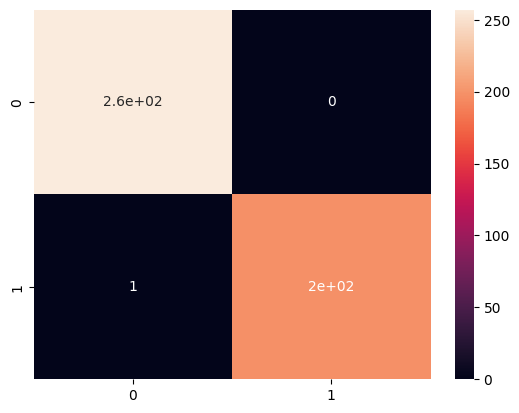

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

**PyTorch cross-validation**

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Evaluation metric
def evaluate_model(model, X, y):
    y_pred = model(X)  # Assuming your model takes input 'X'
    y_pred = (y_pred > 0.5).int().numpy()  # Convert model predictions to numpy array
    return accuracy_score(y, y_pred)

# Create a StratifiedKFold cross-validation object
num_folds = 3  # Number of cross-validation folds
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in skf.split(inputs, outputs):
    X_train, X_test = torch.tensor(inputs[train_index], dtype=torch.float32), torch.tensor(inputs[test_index], dtype=torch.float32)
    y_train, y_test = torch.tensor(outputs[train_index], dtype=torch.float32), torch.tensor(outputs[test_index], dtype=torch.float32)

    # Define your optimizer and loss function
    optimizer = torch.optim.SGD(network.parameters(), lr=0.1)
    loss_fn = torch.nn.BCELoss()

    # Training loop
    num_epochs = 100  # Adjust as needed
    for epoch in range(num_epochs):
        network.train()
        optimizer.zero_grad()
        y_pred = network(X_train)
        loss = loss_fn(y_pred, y_train.view(-1, 1))  # Assuming binary classification
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    network.eval()
    with torch.no_grad():
        test_score = evaluate_model(network, X_test, y_test)
        cv_scores.append(test_score)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_dev)


Cross-Validation Scores: [0.9940828402366864, 0.9802371541501976, 0.9901185770750988]
Mean Accuracy: 0.9881461904873275
Standard Deviation: 0.005821997792288119


# Deep Graph Library (DGL)

In [ ]:
import pandas as pd
metabric_df = pd.read_csv('metabric_part7.csv')

import pandas as pd
ad_matrix = pd.read_csv('adjacency_matrix.csv')

In [ ]:
metabric_df['Relapse_Free_Status']

0       0
1       1
2       1
3       0
4       1
       ..
1514    0
1515    0
1516    1
1517    0
1518    0
Name: Relapse_Free_Status, Length: 1519, dtype: int64

In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 10.2 MB/s eta 0:00:00


In [ ]:
class_values = sorted(metabric_df["Relapse_Free_Status"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
patient_idx = {name: idx for idx, name in enumerate(sorted(metabric_df["PATIENT_ID"].unique()))}

metabric_df["PATIENT_ID"] = metabric_df["PATIENT_ID"].apply(lambda name: patient_idx[name])
ad_matrix["source"] = ad_matrix["source"].apply(lambda name: patient_idx[name])
ad_matrix["target"] = ad_matrix["target"].apply(lambda name: patient_idx[name])
metabric_df["Relapse_Free_Status"] = metabric_df["Relapse_Free_Status"].apply(lambda value: class_idx[value])

In [ ]:
!pip install torch_geometric
import tensorflow as tf
import torch
import dgl
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']
feature_names = set(feature_cols)
labels = metabric_df['Relapse_Free_Status']
num_labels = len(labels.unique())
edges = torch.from_numpy(ad_matrix[["source", "target"]].to_numpy().T)

scaler = MinMaxScaler()
metabric_df[feature_cols] = scaler.fit_transform(metabric_df[feature_cols])

# Convert node_features to a NumPy array
node_features = metabric_df.sort_values("PATIENT_ID")[feature_names].to_numpy().astype('float32')

data = Data(x=torch.tensor(node_features), edge_index=edges, y=torch.tensor(labels.values), num_nodes=node_features.shape[0])

num_nodes = data.num_nodes
num_edges = data.edge_index.shape[1]

# Create a DGLGraph
g = dgl.DGLGraph()
g.add_nodes(num_nodes)
g.add_edges(edges[0], edges[1])

features = data.x
labels_tensor = data.y

print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=4ea94797f59c37c7bb99382a1e1defae6ec832d32b5e89c2a3a19d1dbcab4982
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric
Number of nodes: 1519
Number of edges: 7110


<ipython-input-10-4d1eeb4c002c>:19: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  node_features = metabric_df.sort_values("PATIENT_ID")[feature_names].to_numpy().astype('float32')
/usr/local/lib/python3.10/dist-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

num_samples = metabric_df.shape[0]

# Split data into train, validation, and test sets
train_indices, temp_indices = train_test_split(np.arange(num_samples), test_size=0.3, random_state=42)
val_indices, test_indices = train_test_split(temp_indices, test_size=0.8, random_state=42)

# Create boolean masks
train_mask = np.zeros(num_samples, dtype=bool)
train_mask[train_indices] = True

val_mask = np.zeros(num_samples, dtype=bool)
val_mask[val_indices] = True

test_mask = np.zeros(num_samples, dtype=bool)
test_mask[test_indices] = True

print("Train set size:", np.sum(train_mask))
print("Validation set size:", np.sum(val_mask))
print("Test set size:", np.sum(test_mask))

Train set size: 1063
Validation set size: 91
Test set size: 365


In [ ]:
import dgl
import dgl.data
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class GraphSAGEModel(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats):
        super(GraphSAGEModel, self).__init__()
        #self.conv1 = dgl.nn.SAGEConv(in_feats, out_feats, 'mean')
        self.conv1 = dgl.nn.SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = dgl.nn.SAGEConv(h_feats, h_feats, 'mean')
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(h_feats, out_feats)

    def forward(self, g, in_feats):
        h = self.conv1(g, in_feats)
        h = F.relu(h)
        h = self.conv2(g, h)
        h = self.dropout(h)
        h = self.fc2(h)
        return h


# Initialize model, optimizer, and loss function
model = GraphSAGEModel(in_feats=len(feature_cols), h_feats=5, out_feats=num_labels)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    logits = model(g, data.x)
    loss = loss_fn(logits[train_mask], labels_tensor[train_mask])
    print('Epoch {}: Loss: {:.4f}'.format(epoch, loss.item()))
    loss.backward()
    optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    logits = model(g, features)
    predicted_labels = logits.argmax(dim=1)
    train_acc = accuracy_score(labels[train_mask], predicted_labels[train_mask])
    test_acc = accuracy_score(labels[test_mask], predicted_labels[test_mask])


#print(f"Accuracy on training set: {train_acc:.4f}%")
print(f"Accuracy on testing set: {test_acc:.4f}%")

Epoch 0: Loss: 1.3846
Epoch 1: Loss: 1.2891
Epoch 2: Loss: 1.3115
Epoch 3: Loss: 1.2035
Epoch 4: Loss: 1.1896
Epoch 5: Loss: 1.2270
Epoch 6: Loss: 1.2103
Epoch 7: Loss: 1.1596
Epoch 8: Loss: 1.2337
Epoch 9: Loss: 1.1606
Epoch 10: Loss: 1.1456
Epoch 11: Loss: 1.1259
Epoch 12: Loss: 1.1200
Epoch 13: Loss: 1.0962
Epoch 14: Loss: 1.0802
Epoch 15: Loss: 1.0435
Epoch 16: Loss: 1.0563
Epoch 17: Loss: 1.0380
Epoch 18: Loss: 1.0326
Epoch 19: Loss: 1.0275
Epoch 20: Loss: 1.0040
Epoch 21: Loss: 1.0072
Epoch 22: Loss: 0.9347
Epoch 23: Loss: 0.9549
Epoch 24: Loss: 0.9088
Epoch 25: Loss: 0.9444
Epoch 26: Loss: 0.9454
Epoch 27: Loss: 0.8823
Epoch 28: Loss: 0.9217
Epoch 29: Loss: 0.8832
Epoch 30: Loss: 0.8820
Epoch 31: Loss: 0.8781
Epoch 32: Loss: 0.8734
Epoch 33: Loss: 0.8693
Epoch 34: Loss: 0.8804
Epoch 35: Loss: 0.8273
Epoch 36: Loss: 0.8405
Epoch 37: Loss: 0.8206
Epoch 38: Loss: 0.8304
Epoch 39: Loss: 0.8223
Epoch 40: Loss: 0.7727
Epoch 41: Loss: 0.7947
Epoch 42: Loss: 0.8099
Epoch 43: Loss: 0.815

**DGL cross-validation**

In [ ]:
import dgl
import torch
import torch.nn as nn
import torch.optim as optim
from dgl.data import DGLDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Hyperparameters
num_epochs = 500
num_hidden = 5
num_classes = 2
learning_rate = 0.001
num_folds = 3  # Number of cross-validation folds
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
import tensorflow as tf
import torch
import warnings
warnings.filterwarnings('ignore')

feature_cols = ['PATIENT_ID' ,'Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']
X = metabric_df[feature_cols]
y = metabric_df['Relapse_Free_Status']

# Initialize lists to store the evaluation results
accuracy_scores = []

# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

for train_index, test_index in skf.split(X, y):
    # Split your data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Normalize your data using the scaler
    #X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])
    #X_test.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])

    # Convert train_index and test_index to TensorFlow tensors
    train_index_tensor = tf.constant(train_index, dtype=tf.int32)
    test_index_tensor = tf.constant(test_index, dtype=tf.int32)

    # Index node features using train_index and test_index
    node_features = pd.DataFrame(node_features)
    features_train = node_features.loc[train_index_tensor].to_numpy()
    features_test = node_features.loc[test_index_tensor].to_numpy()

    # Create DGL graphs for training and testing
    g_training = g.subgraph(train_index)
    g_testing = g.subgraph(test_index)

    # Convert features_train to a PyTorch tensor
    features_train_tensor = torch.tensor(features_train, dtype=torch.float32)
    features_test_tensor = torch.tensor(features_test, dtype=torch.float32)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Ensure that logits and labels_tensor use the correct indices
        logits = model(g_training, features_train_tensor)
        loss = loss_fn(logits, labels_tensor[train_index])  # Use train_index here
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    logits = model(g_testing, features_test_tensor)
    predicted_labels = logits.argmax(dim=1)
    accuracy = accuracy_score(y_test[test_index], predicted_labels)
    accuracy_scores.append(accuracy)

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation:", np.std(accuracy_scores))


Cross-Validation Accuracy Scores: [0.9053254437869822, 0.8992094861660079, 0.9407114624505929]
Mean Accuracy: 0.9150821308011943
Standard Deviation: 0.018293864454173973


AUC

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate logits and probabilities
logits = model(g_testing, features_test_tensor)
probabilities = tf.nn.softmax(logits.detach().numpy())
# Assuming `predicted_probs` contains the predicted probabilities and `labels` contains the ground truth labels
predicted_probs = np.argmax(probabilities, axis=1)

# Calculate ROC AUC score
auc = roc_auc_score(y_test, predicted_probs)

print("AUC:", auc)


AUC: 0.9440138092756644


In [ ]:
predicted_probs

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

F1

In [ ]:
import numpy as np
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

# 0.1 , 1
# Assume you have two sets of predictions from your GNN model
predictions_group1 = np.array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])
predictions_group2 = np.array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]) # waiting next time of running

# Perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = stats.ttest_ind(predictions_group1, predictions_group2)
# Print the calculated p-value
print("p-value:", p_value)

f1 = f1_score(y_test, predicted_probs)
print("F1 score:", f1)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, predicted_probs)
print("Balanced accuracy:", balanced_acc)

p-value: 0.8999297171221673
F1 score: 0.9024943310657597
Balanced accuracy: 0.9267847837415321


# Graph attention network (GATs) node classification

---



**Data importing**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 6)
pd.set_option("display.max_rows", 6)
np.random.seed(2)

In [ ]:
import pandas as pd
metabric_df = pd.read_csv('metabric_part7.csv')

import pandas as pd
ad_matrix = pd.read_csv('adjacency_matrix.csv')

In [ ]:
inputs = ['PATIENT_ID','Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status','Relapse_Free_Status']
metabric_df = metabric_df[inputs]
labels = metabric_df['Relapse_Free_Status']

**Data Normalisation**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
metabric_df.iloc[:,1:-1] = scaler.fit_transform(metabric_df.iloc[:,1:-1])
#features = torch.tensor(features, dtype=torch.float32)

In [ ]:
metabric_df.head(3)

PATIENT_ID  Relapse_Free_Status_Months  Overall_Survival_Months  ...  \
0           2                    0.256181                 0.250890  ...   
1           8                    0.056898                 0.122477  ...   
2          10                    0.008864                 0.022853  ...   

   Integrative_Cluster  Patient_Vital_Status  Relapse_Free_Status  
0                  0.4                   1.0                    0  
1                  1.0                   0.0                    1  
2                  0.8                   0.0                    1  

[3 rows x 11 columns]

In [ ]:
class_values = sorted(metabric_df["Relapse_Free_Status"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
patient_idx = {name: idx for idx, name in enumerate(sorted(metabric_df["PATIENT_ID"].unique()))}

metabric_df["PATIENT_ID"] = metabric_df["PATIENT_ID"].apply(lambda name: patient_idx[name])
ad_matrix["source"] = ad_matrix["source"].apply(lambda name: patient_idx[name])
ad_matrix["target"] = ad_matrix["target"].apply(lambda name: patient_idx[name])
metabric_df["Relapse_Free_Status"] = metabric_df["Relapse_Free_Status"].apply(lambda value: class_idx[value])

**Split dataset**

In [ ]:
# Obtain random indices
random_indices = np.random.permutation(range(metabric_df.shape[0]))
n_train = int(len(random_indices)*80/100)
train_data, test_data = metabric_df.iloc[random_indices[:n_train]], metabric_df.iloc[random_indices[n_train:]]

test_data

PATIENT_ID  Relapse_Free_Status_Months  Overall_Survival_Months  ...  \
1117        1117                    0.175971                 0.172240  ...   
554          554                    0.730293                 0.715770  ...   
1433        1433                    0.327096                 0.320439  ...   
...          ...                         ...                      ...  ...   
493          493                    0.658549                 0.645429  ...   
527          527                    0.762775                 0.747626  ...   
1192        1192                    0.560395                 0.549169  ...   

      Integrative_Cluster  Patient_Vital_Status  Relapse_Free_Status  
1117                  1.0                   0.5                    0  
554                   0.9                   1.0                    0  
1433                  1.0                   1.0                    0  
...                   ...                   ...                  ...  
493                   0.9                   0.5                    0  
527                   0.4                   1.0                    0  
1192                  0.9                   1.0                    0  

[304 rows x 11 columns]

**Prepare the graph data**

In [ ]:
# Obtain patient indices which will be used to gather node states
# from the graph later on when training the model
train_indices = train_data["PATIENT_ID"].to_numpy()
test_indices = test_data["PATIENT_ID"].to_numpy()

# Obtain ground truth labels corresponding to each paper_id
train_labels = train_data["Relapse_Free_Status"].to_numpy()
test_labels = test_data["Relapse_Free_Status"].to_numpy()

# Define graph, namely an edge tensor and a node feature tensor
edges = tf.convert_to_tensor(ad_matrix[["target", "source"]])
node_states = tf.convert_to_tensor(metabric_df.sort_values("PATIENT_ID").iloc[:, 1:-1])

# Print shapes of the graph
print("Edges shape:\t\t", edges.shape)
print("Node features shape:", node_states.shape)

Edges shape:		 (7110, 2)
Node features shape: (1519, 9)


In [ ]:
node_states

<tf.Tensor: shape=(1519, 9), dtype=float64, numpy=
array([[0.2561806 , 0.25089038, 0.        , ..., 0.56179775, 0.4       ,
        1.        ],
       [0.05689835, 0.12247725, 0.19512195, ..., 0.94756554, 1.        ,
        0.        ],
       [0.00886449, 0.02285319, 0.        , ..., 0.56966292, 0.8       ,
        0.        ],
       ...,
       [0.45080056, 0.60219628, 0.02439024, ..., 0.75093633, 0.7       ,
        0.5       ],
       [0.48018526, 0.4705184 , 0.07317073, ..., 0.75468165, 0.3       ,
        0.5       ],
       [0.59591436, 0.58399288, 0.02439024, ..., 0.75468165, 0.3       ,
        1.        ]])>

**Build the model**

In [ ]:
class GraphAttention(layers.Layer):
    def __init__(
        self,
        units,
        kernel_initializer="glorot_uniform",
        kernel_regularizer=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.units = units
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)

    def build(self, input_shape):

        self.kernel = self.add_weight(
            shape=(input_shape[0][-1], self.units),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel",
        )
        self.kernel_attention = self.add_weight(
            shape=(self.units * 2, 1),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel_attention",
        )
        self.built = True

    def call(self, inputs):
        node_states, edges = inputs

        # Linearly transform node states
        node_states_transformed = tf.matmul(node_states, self.kernel)

        # (1) Compute pair-wise attention scores
        node_states_expanded = tf.gather(node_states_transformed, edges)
        node_states_expanded = tf.reshape(
            node_states_expanded, (tf.shape(edges)[0], -1)
        )
        attention_scores = tf.nn.leaky_relu(
            tf.matmul(node_states_expanded, self.kernel_attention)
        )
        attention_scores = tf.squeeze(attention_scores, -1)

        # (2) Normalize attention scores
        attention_scores = tf.math.exp(tf.clip_by_value(attention_scores, -2, 2))
        attention_scores_sum = tf.math.unsorted_segment_sum(
            data=attention_scores,
            segment_ids=edges[:, 0],
            num_segments=tf.reduce_max(edges[:, 0]) + 1,
        )
        attention_scores_sum = tf.repeat(
            attention_scores_sum, tf.math.bincount(tf.cast(edges[:, 0], "int32"))
        )
        attention_scores_norm = attention_scores / attention_scores_sum

        # (3) Gather node states of neighbors, apply attention scores and aggregate
        node_states_neighbors = tf.gather(node_states_transformed, edges[:, 1])
        out = tf.math.unsorted_segment_sum(
            data=node_states_neighbors * attention_scores_norm[:, tf.newaxis],
            segment_ids=edges[:, 0],
            num_segments=tf.shape(node_states)[0],
        )
        return out


class MultiHeadGraphAttention(layers.Layer):
    def __init__(self, units, num_heads=8, merge_type="concat", **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]

    def call(self, inputs):
        atom_features, pair_indices = inputs

        # Obtain outputs from each attention head
        outputs = [
            attention_layer([atom_features, pair_indices])
            for attention_layer in self.attention_layers
        ]
        # Concatenate or average the node states from each head
        if self.merge_type == "concat":
            outputs = tf.concat(outputs, axis=-1)
        else:
            outputs = tf.reduce_mean(tf.stack(outputs, axis=-1), axis=-1)
        # Activate and return node states
        return tf.nn.relu(outputs)

Implement training logic with custom train_step, test_step, and predict_step methods

In [ ]:
class GraphAttentionNetwork(keras.Model):
    def __init__(
        self,
        node_states,
        edges,
        hidden_units,
        num_heads,
        num_layers,
        output_dim,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.node_states = node_states
        self.edges = edges
        self.preprocess = layers.Dense(hidden_units * num_heads, activation="relu")
        self.attention_layers = [
            MultiHeadGraphAttention(hidden_units, num_heads) for _ in range(num_layers)
        ]
        self.output_layer = layers.Dense(output_dim)

    def call(self, inputs):
        node_states, edges = inputs
        x = self.preprocess(node_states)
        for attention_layer in self.attention_layers:
            x = attention_layer([x, edges]) + x
        outputs = self.output_layer(x)
        return outputs

    def train_step(self, data):
        indices, labels = data

        with tf.GradientTape() as tape:
            # Forward pass
            outputs = self([self.node_states, self.edges])
            # Compute loss
            loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, data):
        indices = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute probabilities
        return tf.nn.softmax(tf.gather(outputs, indices))

    def test_step(self, data):
        indices, labels = data
        # Forward pass
        outputs = self([self.node_states, self.edges])
        # Compute loss
        loss = self.compiled_loss(labels, tf.gather(outputs, indices))
        # Update metric(s)
        self.compiled_metrics.update_state(labels, tf.gather(outputs, indices))

        return {m.name: m.result() for m in self.metrics}

Train and evaluate

In [ ]:
# Define hyper-parameters
HIDDEN_UNITS = 32
NUM_HEADS = 8
NUM_LAYERS = 3
OUTPUT_DIM = len(class_values)

NUM_EPOCHS = 100
BATCH_SIZE = 183
VALIDATION_SPLIT = 0.1
LEARNING_RATE = 0.01
MOMENTUM = 0.9

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(LEARNING_RATE, momentum=MOMENTUM)
accuracy_fn = keras.metrics.SparseCategoricalAccuracy(name="acc")
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_acc", min_delta=1e-5, patience=5, restore_best_weights=True
)

# Build model
gat_model = GraphAttentionNetwork(
    node_states, edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM
)

# Compile model
gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

gat_model.fit(
    x=train_indices,
    y=train_labels,
    validation_split=VALIDATION_SPLIT,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    verbose=2,
)

_, test_accuracy = gat_model.evaluate(x=test_indices, y=test_labels, verbose=0)

print("--" * 50 + f"\nTest Accuracy {test_accuracy*100:.1f}%")

Epoch 1/100
6/6 - 16s - loss: 0.7150 - acc: 0.5691 - val_loss: 0.5948 - val_acc: 0.5902 - 16s/epoch - 3s/step
Epoch 2/100
6/6 - 1s - loss: 0.3865 - acc: 0.8124 - val_loss: 0.2990 - val_acc: 0.9344 - 881ms/epoch - 147ms/step
Epoch 3/100
6/6 - 1s - loss: 0.2099 - acc: 0.9488 - val_loss: 0.1822 - val_acc: 0.9426 - 705ms/epoch - 118ms/step
Epoch 4/100
6/6 - 1s - loss: 0.1423 - acc: 0.9515 - val_loss: 0.0978 - val_acc: 0.9836 - 693ms/epoch - 115ms/step
Epoch 5/100
6/6 - 1s - loss: 0.0981 - acc: 0.9625 - val_loss: 0.0808 - val_acc: 0.9836 - 679ms/epoch - 113ms/step
Epoch 6/100
6/6 - 1s - loss: 0.0815 - acc: 0.9652 - val_loss: 0.0620 - val_acc: 0.9836 - 712ms/epoch - 119ms/step
Epoch 7/100
6/6 - 1s - loss: 0.0763 - acc: 0.9698 - val_loss: 0.0549 - val_acc: 0.9836 - 690ms/epoch - 115ms/step
Epoch 8/100
6/6 - 1s - loss: 0.0682 - acc: 0.9716 - val_loss: 0.0533 - val_acc: 0.9836 - 693ms/epoch - 116ms/step
Epoch 9/100
6/6 - 1s - loss: 0.0619 - acc: 0.9744 - val_loss: 0.0457 - val_acc: 0.9836 - 691

GATs Cross-validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow import keras


# Prepare your data (X and y)

feature_cols = ['PATIENT_ID' ,'Relapse_Free_Status_Months', 'Overall_Survival_Months', 'LYMPH_NODES_EXAMINED_POSITIVE', 'Overall_Survival_Status', 'AGE_AT_DIAGNOSIS' , 'TUMOUR_CELLULARITY',  'Nottingham_Prognostic_Index', 'Integrative_Cluster', 'Patient_Vital_Status']
X = metabric_df[feature_cols]
y = metabric_df['Relapse_Free_Status']

# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to store the evaluation results
accuracy_scores = []

# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    x_train = X_train.PATIENT_ID.to_numpy()
    y_train_flat = y_train.values.flatten()
    gat_model.fit(
                    x=x_train,
                    y=y_train_flat,
                    validation_split=VALIDATION_SPLIT,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    callbacks=[early_stopping],
                    verbose=2,
                )

    # Evaluate the model on the test data
    x_test = X_test.PATIENT_ID.to_numpy()
    y_pred = gat_model.predict(x_test, verbose=1)
    y_pred = np.argmax(y_pred, axis=1)

    #y_test = y_test[:len(y_pred)]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation:", np.std(accuracy_scores))


Epoch 1/100
6/6 - 1s - loss: 0.0918 - acc: 0.9716 - val_loss: 0.1095 - val_acc: 0.9672 - 874ms/epoch - 146ms/step
Epoch 2/100
6/6 - 1s - loss: 0.0810 - acc: 0.9744 - val_loss: 0.0990 - val_acc: 0.9672 - 692ms/epoch - 115ms/step
Epoch 3/100
6/6 - 1s - loss: 0.0712 - acc: 0.9726 - val_loss: 0.0948 - val_acc: 0.9672 - 725ms/epoch - 121ms/step
Epoch 4/100
6/6 - 1s - loss: 0.0625 - acc: 0.9771 - val_loss: 0.0836 - val_acc: 0.9672 - 855ms/epoch - 143ms/step
Epoch 5/100
6/6 - 1s - loss: 0.0563 - acc: 0.9780 - val_loss: 0.0778 - val_acc: 0.9590 - 1s/epoch - 177ms/step
Epoch 6/100
6/6 - 1s - loss: 0.0510 - acc: 0.9826 - val_loss: 0.0785 - val_acc: 0.9672 - 1s/epoch - 183ms/step
10/10 [==============================] - 7s 84ms/step
Epoch 1/100
6/6 - 1s - loss: 0.0836 - acc: 0.9698 - val_loss: 0.0859 - val_acc: 0.9754 - 1s/epoch - 172ms/step
Epoch 2/100
6/6 - 1s - loss: 0.0756 - acc: 0.9716 - val_loss: 0.0749 - val_acc: 0.9754 - 1s/epoch - 183ms/step
Epoch 3/100
6/6 - 1s - loss: 0.0683 - acc: 0.9

AUC

In [ ]:
from sklearn.metrics import roc_auc_score

logits = gat_model.predict(x_test)
probabilities = tf.nn.softmax(logits)

probabilities = np.argmax(probabilities, axis=1)

# Assuming `predicted_probs` contains the predicted probabilities and `labels` contains the ground truth labels
auc = roc_auc_score(y_test, probabilities)

print("AUC:", auc)

10/10 [==============================] - 0s 29ms/step
AUC: 0.9889882844428299


In [ ]:
probabilities

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import numpy as np
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

# 0.1 , 1
# Assume you have two sets of predictions from your GNN model
predictions_group1 = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
predictions_group2 = np.array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) # waiting next time of running

# Perform a two-sample t-test to compare the means of the two groups
t_statistic, p_value = stats.ttest_ind(predictions_group1, predictions_group2)
# Print the calculated p-value
print("p-value:", p_value)

f1 = f1_score(y_test, probabilities)
print("F1 score:", f1)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, probabilities)
print("Balanced accuracy:", balanced_acc)

p-value: 0.8685152748996081
F1 score: 0.9875518672199171
Balanced accuracy: 0.9889882844428299
